<a href="https://colab.research.google.com/github/Hamerson-jhoel/S-Sistemas-2025-1/blob/main/QUIZ/quiz_7_11_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hamerson Joel Piarpuezan

# QUIZ

##  Requerimientos del Enunciado

La señal de **Banda Base** está definida por 8 símbolos y la señal modulada $s(t)$ en **RF** debe construirse con los siguientes parámetros:

1.  **Símbolos (Bits):** $d = [d_i] \in \mathbb{R}^8$ (Generar 8 símbolos binarios, por ejemplo, $d = [0, 1, 1, 0, 0, 1, 0, 1]$).
2.  **Mapeo de Amplitud (ASK):** $d_i \to a_i$ donde $a_i \in \{a_0, a_1\}$.
    $$
    a_i = \begin{cases} a_0 = 0.0 & \text{si } d_i = 0 \\ a_1 = 1.0 & \text{si } d_i = 1 \end{cases}
    $$
3.  **Pulso:** $V_i(t) = \text{rect}_{T}(t)$ (Pulso rectangular de duración $T$ por símbolo).
4.  **Fase por Símbolo:** La fase debe ser variable y dependiente del índice $i$ del símbolo (asumiendo $i=1, 2, \dots, 8$):
    $$
    \phi_i(t) = \phi_i = 2i - 1 \quad \text{radianes}
    $$
5.  **Señal RF:**
    $$
    s(t) = a_i V_i(t)\cos(\omega_0 t + \phi_i) \quad \forall t \in T
    $$

## ⚙️ Parámetros a Usar en el Código

| Parámetro | Símbolo | Valor |
| :--- | :--- | :--- |
| Duración Símbolo | $T$ | $0.002 \text{ s}$ |
| Frecuencia Muestreo | $f_s$ | $20000 \text{ Hz}$ |
| Frecuencia Portadora | $f_c$ | $5000 \text{ Hz}$ |
| Amplitud Nivel 0 | $a_0$ | $0.0$ |
| Amplitud Nivel 1 | $a_1$ | $1.0$ |

#Parte matematica

## 📝 Procedimiento Matemático de la Generación y Análisis de 8 Tramas BB

### 1. Definición del Modelo de Señal 📡

La señal modulada en radiofrecuencia (RF) $\mathbf{s(t)}$ se construye como una suma concatenada de 8 símbolos discretos. Cada símbolo $s_i(t)$ está definido por una amplitud $a_i$ (modulación ASK), un pulso rectangular $V_i(t)$, y una fase $\phi_i$ que varía con el índice del símbolo $i$.

La expresión general de la señal total es:
$$\mathbf{s(t)} = \sum_{i=0}^{7} s_i(t - iT), \quad \text{donde} \quad s_i(t) = a_i V_i(t)\cos(\omega_0 t + \phi_i).$$

---

### 2. Generación de Cada Símbolo (i = 0 a 7) 🧮

El procedimiento se repite para cada uno de los 8 símbolos ($i=0, 1, \dots, 7$).

#### A. Mapeo de Amplitud (ASK)

El bit de entrada $d_i \in \{0, 1\}$ determina la amplitud del símbolo, cumpliendo con la definición de ASK:

$$\mathbf{a_i} = \begin{cases} a_0 = 0.0 & \text{si } d_i=0 \\ a_1 = 1.0 & \text{si } d_i=1 \end{cases}$$

#### B. Mapeo de Fase Variable

La fase del símbolo $\mathbf{\phi_i}$ es **determinística** y depende del índice del símbolo (asumiendo $i$ desde 0 en el código, lo que corresponde al índice $i+1$ del enunciado $1, \dots, 8$):

$$\mathbf{\phi_i} = 2(i+1) - 1 \quad \text{radianes}$$

#### C. Pulso Base y Discretización

El pulso base es un pulso rectangular de duración $\mathbf{T}$ ($0.002 \text{ s}$), representado por $\mathbf{V_i(t) = \operatorname{rect}_T(t)}$.

La señal del $\mathbf{i}$-ésimo símbolo en tiempo discreto, $s_i[n]$, se define sobre $\mathbf{N_{\text{sps}}} = 40$ muestras:

$$\mathbf{s_i[n]} = a_i \cdot \cos\left(2\pi f_c t[n] + \phi_i\right)$$

Donde $t[n]$ es el vector de tiempo discreto dentro del intervalo del símbolo $i$.

---

### 3. Análisis Espectral (FFT) 📉

El análisis se realiza para contrastar la **dispersión espectral** de un pulso rectangular individual versus la señal total (concatenada y con fase variable).

#### A. FFT de un Símbolo Aislado (e.g., Símbolo con $d_i=1$)

Se aísla el vector de $\mathbf{N_{\text{sps}}}$ muestras del símbolo de interés (e.g., $i=1$).

$$\mathbf{S_{\text{sym}}[k]} = \text{FFT}(\mathbf{s}_{\text{sym}}[n] \cdot \mathbf{w}_{\text{sym}}[n])$$

#### B. FFT de la Señal Total

Se aplica la FFT a la señal completa $\mathbf{s[n]}$ de $N_{\text{total}}=320$ muestras:

$$\mathbf{S_{\text{total}}[k]} = \text{FFT}(\mathbf{s}[n] \cdot \mathbf{w}_{\text{total}}[n])$$

Donde $\mathbf{w}[n]$ es la **Ventana de Hann** y la magnitud final se expresa en decibelios (dB) normalizada:

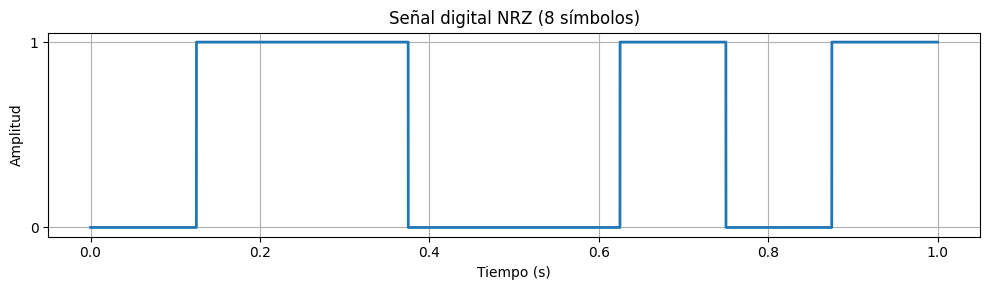

Primeras 20 muestras de la señal NRZ:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parámetros de la Trama ---
d = np.array([0, 1, 1, 0, 0, 1, 0, 1])  # 8 símbolos
T = 0.125                               # Duración de símbolo (Tb) [s]
fs = 20000                              # Frecuencia de muestreo [Hz]
sps = int(fs * T)                       # Muestras por símbolo

# --- Construcción de la Señal NRZ ---
# 1. Vector de tiempo para un solo símbolo
t_symbol = np.linspace(0, T, sps, endpoint=False)

# 2. Vector de tiempo total
N_symbols = len(d)
time = np.concatenate([t_symbol + i * T for i in range(N_symbols)])

# 3. Mapeo de amplitud y repetición para crear los cuadros
# La señal NRZ (Non-Return-to-Zero) es la repetición del nivel (0 o 1) por el tiempo T
signal = np.repeat(d, sps)

# --- Gráfica de los Cuadros ---
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(time, signal, linewidth=2.0)
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Amplitud')
ax.set_title(f'Señal digital NRZ ({N_symbols} símbolos)')
ax.grid(True)
ax.set_yticks([0, 1]) # Aseguramos que solo muestre los niveles 0 y 1
plt.tight_layout()
plt.show()

print("Primeras 20 muestras de la señal NRZ:")
print(signal[:20])

## 📝 Base Matemática de la Señal ASK con Fase Variable

La señal generada es una secuencia de **8 símbolos** que modulan una portadora $\mathbf{\cos(\omega_0 t)}$ en amplitud y fase.

---

### 1. Definición de Parámetros y Tiempo

Los parámetros físicos se discretizan mediante la frecuencia de muestreo $f_s$:

| Parámetro | Símbolo | Valor del Código |
| :--- | :--- | :--- |
| Duración Símbolo | $T_b$ | $0.002 \text{ s}$ |
| Frecuencia Muestreo | $f_s$ | $20000 \text{ Hz}$ |
| Frecuencia Portadora | $f_c$ | $5000 \text{ Hz}$ |

* **Muestras por Símbolo ($\mathbf{N_{\text{sps}}}$):**
    $$N_{\text{sps}} = f_s \cdot T_b = 20000 \cdot 0.002 = 40 \text{ muestras}$$
* **Frecuencia Angular de la Portadora ($\mathbf{\omega_0}$):**
    $$\omega_0 = 2\pi f_c$$
* **Vector de Tiempo Discreto ($\mathbf{t}$):**
    $$t[n] = n \cdot \frac{1}{f_s}, \quad n = 0, 1, \dots, N_{\text{total}}-1.$$

---

### 2. Mapeo de Amplitud y Fase

La modulación se aplica a cada símbolo $\mathbf{i}$ (donde $\mathbf{i=1, 2, \dots, 8}$ en el contexto de la fase):

#### A. Mapeo de Amplitud ($\mathbf{a_i}$)
El código implementa una modulación **OOK (On-Off Keying)**, mapeando el bit de entrada $\mathbf{d_i \in \{0, 1\}}$ a una amplitud $\mathbf{a_i}$:
$$a_i = \begin{cases} a_0 = 0.0 & \text{si } d_i=0 \\ a_1 = 1.0 & \text{si } d_i=1 \end{cases}$$

#### B. Fase Variable por Símbolo ($\mathbf{\phi_i}$)
La fase es una función lineal del índice del símbolo $\mathbf{i}$ (asumiendo $\mathbf{i=1, \dots, 8}$):
$$\mathbf{\phi_i} = 2i - 1 \quad \text{radianes}$$

---

### 3. Señal Final de Radiofrecuencia ($\mathbf{s[n]}$)

La señal total es la suma concatenada de 8 símbolos. La expresión matemática continua es:

$$\mathbf{s(t)} = \sum_{i=1}^{8} a_i \cdot \operatorname{rect}_{T_b}(t - (i-1)T_b) \cdot \cos(\omega_0 t + \phi_i)$$

En el dominio discreto, la señal está dada por:

$$\mathbf{s[n]} = a_i \cdot \cos\left(\omega_0 t[n] + \phi_i\right) \quad \text{para las muestras del símbolo } i.$$

✅ Trama generada con éxito.
------------------------------
Amplitudes (a_i): [0. 1. 1. 0. 0. 1. 0. 1.]
Fases (phi_i, rad): [ 1  3  5  7  9 11 13 15]
Número de muestras total: 320


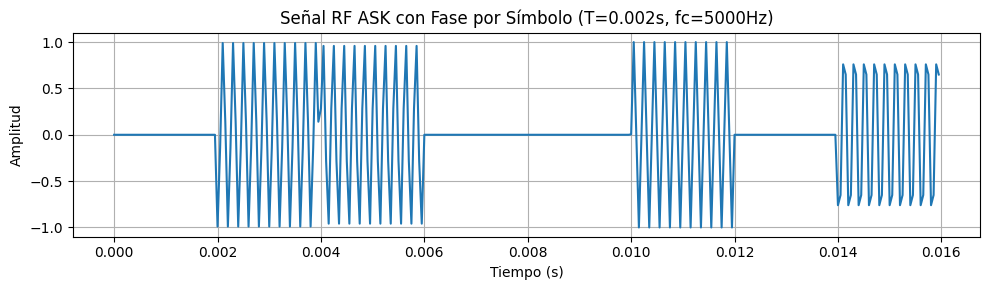

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Parámetros de la Trama ---
d = np.array([0, 1, 1, 0, 0, 1, 0, 1])  # 8 símbolos (d' = [di])
T = 0.002                               # Duración de símbolo (TAO) [s]
fs = 20000                              # Frecuencia de muestreo [Hz]
fc = 5000                               # Frecuencia portadora (w0) [Hz]

# --- 2. Preparación de Tiempo y Muestras ---
sps = int(fs * T)                       # Samples por símbolo
N_symbols = len(d)
t_symbol = np.linspace(0, T, sps, endpoint=False)
time = np.concatenate([t_symbol + i * T for i in range(N_symbols)])

# --- 3. Mapeo de Amplitud (ai en {a0, a1}) ---
a0 = 0.0  # Amplitud para símbolo 0
a1 = 1.0  # Amplitud para símbolo 1
a = np.where(d == 1, a1, a0)
a_rep = np.repeat(a, sps)

# --- 4. Mapeo de Fase (phi_i = 2i - 1) ---
# Asumimos i = 1..N
phi_symbols = np.array([2 * (i + 1) - 1 for i in range(N_symbols)])
phi_rep = np.repeat(phi_symbols, sps)

# --- 5. Generación de la Señal RF ---
# s(t) = a_i * rect_T(t) * cos(w0*t + phi_i(t))
w0 = 2 * np.pi * fc
rf_signal = a_rep * np.cos(w0 * time + phi_rep)

# --- 6. Visualización y Resumen ---
print("✅ Trama generada con éxito.")
print("-" * 30)
print(f"Amplitudes (a_i): {a}")
print(f"Fases (phi_i, rad): {np.round(phi_symbols, 2)}")
print(f"Número de muestras total: {len(rf_signal)}")

plt.figure(figsize=(10, 3))
plt.plot(time, rf_signal)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title(f"Señal RF ASK con Fase por Símbolo (T={T}s, fc={fc}Hz)")
plt.grid(True)
plt.tight_layout()
plt.show()

Asunción: i toma valores 1..N. Por tanto fi para cada símbolo (radianes):
  símbolo 1: fi = 1.000 rad
  símbolo 2: fi = 3.000 rad
  símbolo 3: fi = 5.000 rad
  símbolo 4: fi = 7.000 rad
  símbolo 5: fi = 9.000 rad
  símbolo 6: fi = 11.000 rad
  símbolo 7: fi = 13.000 rad
  símbolo 8: fi = 15.000 rad

Primeras 40 muestras de la señal RF:
[ 0. -0. -0.  0.  0. -0. -0.  0.  0. -0. -0.  0.  0. -0. -0.  0.  0. -0.
 -0.  0.  0. -0. -0.  0.  0. -0. -0.  0.  0. -0. -0.  0.  0. -0. -0.  0.
  0. -0. -0.  0.]

Figura guardada en: /content/rf_with_phase.png


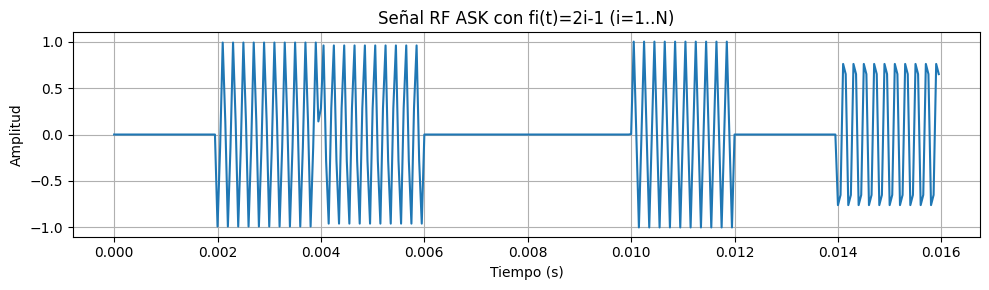

In [3]:
# Señal RF ASK con fase por símbolo fi(t) = 2*i - 1 (asumimos i empieza en 1)
import numpy as np
import matplotlib.pyplot as plt

# Parámetros (puedes editar)
d = np.array([0,1,1,0,0,1,0,1])   # símbolos (8)
Tb = 0.002                        # duración símbolo [s]
fs = 20000                        # frecuencia de muestreo [Hz]
sps = int(fs*Tb)                  # samples por símbolo
a0 = 0.0                          # amplitud para símbolo 0 (OOK)
a1 = 1.0                          # amplitud para símbolo 1
fc = 5000                         # frecuencia portadora [Hz]
w0 = 2*np.pi*fc

# Tiempo y baseband
t_symbol = np.linspace(0, Tb, sps, endpoint=False)
time = np.concatenate([t_symbol + i*Tb for i in range(len(d))])
a = np.where(d==1, a1, a0)        # mapeo ai
a_rep = np.repeat(a, sps)

# Definimos phi por símbolo: fi = 2*i - 1
# IMPORTANTE: asumimos i = 1..N (no 0..N-1). Si prefieres que i empiece en 0, dime.
N = len(d)
phi_symbols = np.array([2*(i+1) - 1 for i in range(N)])  # i+1 para empezar en 1
phi_rep = np.repeat(phi_symbols, sps)

# Generamos la señal RF: ai * rect(t) * cos(w0*t + phi_i)
rf = a_rep * np.cos(w0*time + phi_rep)

# Guardar figura y mostrar resumen
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(time, rf)
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Amplitud')
ax.set_title('Señal RF ASK con fi(t)=2i-1 (i=1..N)')
ax.grid(True)
plt.tight_layout()

fig_path = '/content/rf_with_phase.png'
fig.savefig(fig_path)

# Información que muestro al usuario
print("Asunción: i toma valores 1..N. Por tanto fi para cada símbolo (radianes):")
for idx, ph in enumerate(phi_symbols, start=1):
    print(f"  símbolo {idx}: fi = {ph:.3f} rad")

print("\nPrimeras 40 muestras de la señal RF:")
print(np.round(rf[:40], 4))

print(f"\nFigura guardada en: {fig_path}")

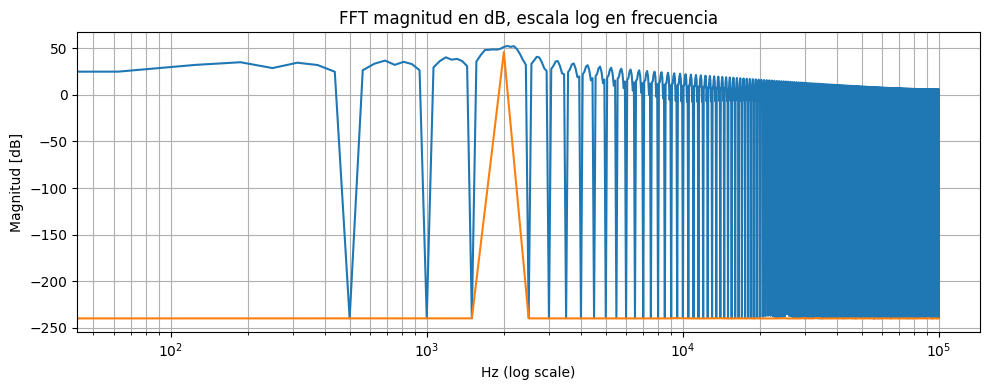

In [4]:
# Replot FFT in dB and log scale
import numpy as np
import matplotlib.pyplot as plt

# We reuse previous data if exists in session; if not, regenerate minimally
try:
    F, M
    F1, M1
except NameError:
    # minimal regeneration (same parameters as last code)
    d = np.array([0,1,1,0,0,1,0,1])
    T  = 0.002
    fs = 200000
    Ts = 1/fs
    N  = len(d)
    a0=0; a1=1
    ai = np.where(d==1,a1,a0)
    Wo = 2*np.pi*2000
    fi = np.array([2*(i+1)-1 for i in range(N)])
    t = np.arange(0, N*T, Ts)
    s = np.zeros_like(t)
    for i in range(N):
        idx = np.where((t>=i*T)&(t<(i+1)*T))[0]
        s[idx]=ai[i]*np.cos(Wo*(t[idx]-i*T)+fi[i])
    i_sym=1
    t1=np.arange(0,T,Ts)
    s1=ai[i_sym]*np.cos(Wo*t1+fi[i_sym])
    def mag_fft(x,fs):
        Nfft=len(x)
        f=np.fft.fftfreq(Nfft,1/fs)
        X=np.fft.fft(x)
        return f[:Nfft//2], np.abs(X[:Nfft//2])
    F1,M1=mag_fft(s1,fs)
    F,M =mag_fft(s ,fs)

# dB conversion
M_db  = 20*np.log10(M  +1e-12)
M1_db = 20*np.log10(M1 +1e-12)

plt.figure(figsize=(10,4))
plt.semilogx(F, M_db)
plt.semilogx(F1,M1_db)
plt.xlabel("Hz (log scale)")
plt.ylabel("Magnitud [dB]")
plt.title("FFT magnitud en dB, escala log en frecuencia")
plt.grid(True, which='both')
plt.tight_layout()
plt.show()


# 📘 Desarrollo Matemático de FFT y Lóbulos Espectrales

Este análisis explica paso a paso la formulación matemática del código: modulación por símbolos, FFT, normalización y cálculo de lóbulos espectrales.

---

## 1. 🔢 Secuencia de Datos y Mapeo ASK

La secuencia binaria es:

$$
d = [0,1,1,0,0,1,0,1].
$$

Las amplitudes usadas:

$$
a_0 = 0, \qquad a_1 = 1.
$$

Entonces:

$$
a_i =
\begin{cases}
a_1, & d_i = 1,\\[4pt]
a_0, & d_i = 0.
\end{cases}
$$

Esto corresponde a **OOK/ASK**.

---

## 2. ⏱ Duración de símbolo y muestreo

Duración del símbolo:

$$
T = 0.002 \;\text{s},
$$

frecuencia de muestreo:

$$
f_s = 200000\ \text{Hz},
\qquad
T_s = \frac{1}{f_s}.
$$

Vector de tiempo:

$$
t = \{0,\, T_s,\, 2T_s,\, \dots,\, N_{\text{sym}}T - T_s\}.
$$

---

## 3. 📡 Portadora y fases

Frecuencia portadora:

$$
f_c = 2000\ \text{Hz}, \qquad \omega_0 = 2\pi f_c.
$$

Las fases asignadas por símbolo son:

$$
\phi_i = 2(i+1) - 1 = 2i + 1, \qquad i=0,\dots,N_{\text{sym}}-1.
$$

---

## 4. 🧱 Construcción de la Señal Modulada

Cada símbolo vive en:

$$
t \in [iT,\ (i+1)T).
$$

La señal transmitida es:

$$
s(t) = a_i \cos\!\left(\omega_0 (t - iT) + \phi_i \right).
$$

**Esta es exactamente la ecuación que implementa el código.**

---

## 5. 🔍 Señal de un Símbolo Aislado

Para un único símbolo:

$$
s_1(t) = a_{i_{\text{sym}}}
\cos\big( 2\pi f_c t + \phi_{i_{\text{sym}}} \big),
\qquad 0 \le t < T.
$$

---

## 6. ⚡ Transformada de Fourier Discreta (FFT)

La FFT computa:

$$
X[k] = \sum_{n=0}^{N_{\text{FFT}}-1} x[n]\,
e^{-j\frac{2\pi}{N_{\text{FFT}}}kn}.
$$

Las frecuencias asociadas:

$$
f[k] = \frac{k}{N_{\text{FFT}}} f_s.
$$

Se toma solamente:

$$
f[k] \ge 0.
$$

La magnitud es:

$$
|X(f)| = \sqrt{(\Re\{X\})^2 + (\Im\{X\})^2 }.
$$

---

## 7. 🎚 Normalización en dB

Cada espectro se normaliza respecto a su máximo:

$$
M_{\text{dB}}(f)
=
20\log_{10}\left(
\frac{|X(f)|}{\max(|X(f)|)} + 10^{-16}
\right).
$$

Esto garantiza que el máximo queda en:

$$
0\ \text{dB}.
$$

---

## 8. 🟦 Lóbulos Espectrales de un Pulso Rectangular

Un símbolo ASK/OOK con forma rectangular tiene como espectro:

$$
S(f) \propto \operatorname{sinc} \!\left( \pi (f - f_c) T \right),
$$

donde:

$$
\operatorname{sinc}(x) = \frac{\sin x}{x}.
$$

### 🔹 Nulos teóricos del espectro

Los ceros se dan cuando:

$$
\pi (f - f_c) T = m\pi
\quad \Rightarrow \quad
f = f_c + \frac{m}{T},
\qquad m = \pm 1, \pm 2, \dots
$$

Para nuestro caso:

$$
f_c = 2000\ \text{Hz}, \qquad T = 0.002,
$$

$$
f_{\text{null}} = f_c \pm \frac{1}{T}
= 2000 \pm 500.
$$

Es decir:

$$
f = 1500\ \text{Hz},\quad 2500\ \text{Hz}.
$$

---

## 9. 🎚 Atenuación del Primer Lóbulo Lateral

El primer máximo lateral ocurre cuando:

$$
\pi (f - f_c)T = \frac{3\pi}{2}
\quad \Rightarrow \quad
f = f_c + \frac{3}{2T}.
$$

La amplitud del primer lóbulo de la sinc:

$$
A_1 = \left| \operatorname{sinc}\left(\tfrac{3\pi}{2}\right) \right|
= \frac{1}{3\pi/2}
\approx 0.2122.
$$

En decibelios:

$$
20\log_{10}(0.2122) \approx -13.26\ \text{dB}.
$$

---

## 10. 📈 Visualización

El código grafica:

- espectro de la trama completa,
- espectro de un símbolo,
- zoom alrededor de $f_c$,
- y marca los nulos en $f_c \pm 1/T$.

---

# ✅ Resumen Matemático

1. **Modulación ASK/OOK:**

$$
s(t) = a_i \cos(\omega_0(t-iT) + \phi_i).
$$

2. **FFT:**

$$
X(f) = \mathcal{F}\{s(t)\}.
$$

3. **Envolvente tipo sinc:**

$$
|S(f)| \propto
\left| \operatorname{sinc}(\pi(f-f_c)T) \right|.
$$

4. **Nulos del espectro:**

$$
f = f_c \pm \frac{1}{T}.
$$

5. **Primer lóbulo lateral:**

$$
\approx -13.26\ \text{dB}.
$$

---


Figura guardada en: /content/fft_normalized_lobes.png
Nota: las curvas están normalizadas a su máximo individual (0 dB).


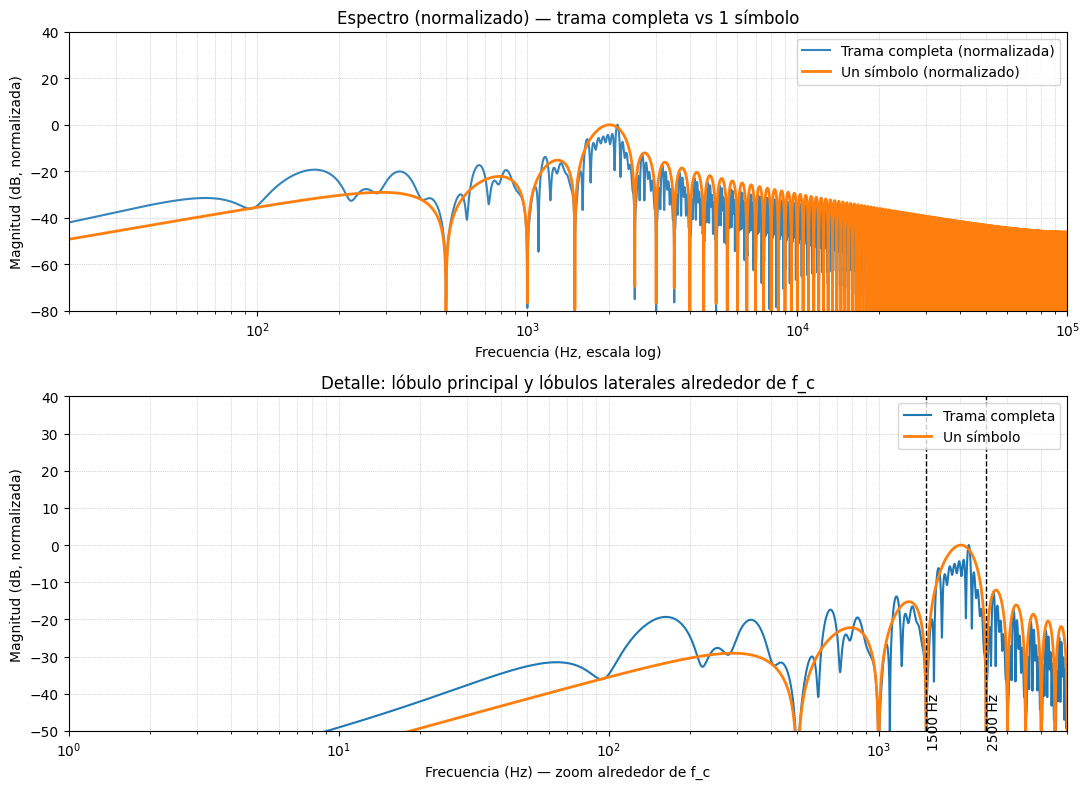

In [5]:
# FFT normalizada y visualización del lóbulo principal y lóbulos laterales
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import windows

# --- Parámetros (mismos que antes) ---
d = np.array([0,1,1,0,0,1,0,1])
T  = 0.002         # duración símbolo [s]
fs = 200000        # frecuencia de muestreo [Hz]
Ts = 1/fs
Nsym = len(d)
a0, a1 = 0.0, 1.0
ai = np.where(d==1, a1, a0)
fc = 2000          # frecuencia portadora [Hz]
w0 = 2*np.pi*fc

# fases por símbolo (como antes: fi = 2*i-1, i=1..N)
phi = np.array([2*(i+1)-1 for i in range(Nsym)])

# tiempo total y señales
t = np.arange(0, Nsym*T, Ts)
s = np.zeros_like(t)
for i in range(Nsym):
    idx = np.where((t>=i*T)&(t<(i+1)*T))[0]
    s[idx] = ai[i] * np.cos(w0*(t[idx]-i*T) + phi[i])

# seleccionar un símbolo (ej. segundo símbolo i=1, índice base 0)
i_sym = 1
t1 = np.arange(0, T, Ts)
s1 = ai[i_sym] * np.cos(2*np.pi*fc*t1 + phi[i_sym])

# --- FFT con zero-padding para buena resolución ---
Nfft = 262144  # potencia de 2 para buena resolución
def compute_fft(x, fs, Nfft):
    X = np.fft.fft(x, n=Nfft)
    f = np.fft.fftfreq(Nfft, 1/fs)
    # solo la mitad positiva
    pos = f >= 0
    return f[pos], np.abs(X[pos])

f_s, M_s = compute_fft(s, fs, Nfft)
f_1, M_1 = compute_fft(s1, fs, Nfft)

# Normalización (cada espectro a su propio máximo -> 0 dB)
M_s_db  = 20*np.log10(M_s / (M_s.max() + 1e-16) + 1e-16)
M_1_db  = 20*np.log10(M_1 / (M_1.max() + 1e-16) + 1e-16)

# Para resaltar lóbulo principal: posiciones de primeros nulos teóricos alrededor de fc
# Para rect_T(t), sinc zeros en (f-fc)T = m => f = fc + m/T
first_nulls = [fc - 1.0/T, fc + 1.0/T]

# --- Ploteo: panel completo y zoom al lóbulo principal ---
fig, (ax_full, ax_zoom) = plt.subplots(2,1, figsize=(11,8), gridspec_kw={'height_ratios':[1,1.2]})

# Full spectrum (dB) - semilogx
ax_full.semilogx(f_s, M_s_db, label='Trama completa (normalizada)', alpha=0.9)
ax_full.semilogx(f_1, M_1_db, label='Un símbolo (normalizado)', linewidth=2)
ax_full.set_xlim(20, fs/2)
ax_full.set_ylim(-80, 40)
ax_full.set_xlabel('Frecuencia (Hz, escala log)')
ax_full.set_ylabel('Magnitud (dB, normalizada)')
ax_full.set_title('Espectro (normalizado) — trama completa vs 1 símbolo')
ax_full.grid(True, which='both', ls=':', lw=0.5)
ax_full.legend(loc='upper right')

# Zoom: alrededor de fc para mostrar lóbulo principal y algunos laterales
fmin = max(1, fc - 6*(1.0/T))
fmax = fc + 6*(1.0/T)
ax_zoom.semilogx(f_s, M_s_db, label='Trama completa')
ax_zoom.semilogx(f_1, M_1_db, label='Un símbolo', linewidth=2)
ax_zoom.set_xlim(fmin, fmax)
ax_zoom.set_ylim(-50, 40)
ax_zoom.set_xlabel('Frecuencia (Hz) — zoom alrededor de f_c')
ax_zoom.set_ylabel('Magnitud (dB, normalizada)')
ax_zoom.set_title('Detalle: lóbulo principal y lóbulos laterales alrededor de f_c')
ax_zoom.grid(True, which='both', ls=':', lw=0.5)
ax_zoom.legend(loc='upper right')

# marcar los primeros nulos teóricos
for fn in first_nulls:
    ax_zoom.axvline(fn, color='k', linestyle='--', linewidth=1)
    ax_zoom.text(fn*1.01, -55, f'{fn:.0f} Hz', rotation=90, va='bottom')

# guardar figura
fig.tight_layout()
out_path = '/content/fft_normalized_lobes.png'
fig.savefig(out_path, dpi=200)

print("Figura guardada en:", out_path)
print("Nota: las curvas están normalizadas a su máximo individual (0 dB).")

### Cálculo del ancho de banda del lóbulo principal

Para un pulso de duración de un símbolo $T$, los primeros ceros del espectro aparecen en:

$$ f = f_c \pm \frac{1}{T} $$

Por lo tanto, el ancho de banda del lóbulo principal es:

$$ BW = 2\left(\frac{1}{T}\right) $$

En el código:

La duración del símbolo es:

$$ T = 1\text{ ms} = 1 \times 10^{-3}\text{ s} $$

Entonces:

$$
BW = 2\left(\frac{1}{T}\right)
   = 2\left(\frac{1}{1\times10^{-3}}\right)
   = 2(1000)
   = 2000\ \text{Hz}
$$

El ancho de banda corresponde a la distancia entre los dos primeros nulos del espectro.


In [6]:
import numpy as np

# --------------------------------------------
# parámetros
# --------------------------------------------
Fs = 1e6         # Hz  (sampling)
T  = 1e-3        # 1 ms  (duración de un símbolo)
fc = 2e3         # Hz
N  = int(T*Fs)

# --------------------------------------------
# construir un pulso (1 símbolo)
# --------------------------------------------
t = np.arange(N)/Fs
p = np.cos(2*np.pi*fc*t)

# --------------------------------------------
# ancho de banda (teórico) lóbulo principal
# zeros de sinc: fc ± 1/T
# --------------------------------------------
BW = 2*(1/T)     # distancia de primer cero a primer cero
                 # (anchura entre los dos primeros nulos)

print("Duración de 1 símbolo T = ", T, " segundos")
print("Ancho de banda del lóbulo principal = ", BW, " Hz")


Duración de 1 símbolo T =  0.001  segundos
Ancho de banda del lóbulo principal =  2000.0  Hz


### 📡 Espectro de un símbolo con duración $T = 125\,\text{ms}$

Para un pulso senoidal modulando un solo símbolo, la envolvente del espectro está dominada por una función tipo sinc, cuyo primer par de nulos se ubica en:

$$ f = f_c \pm \frac{1}{T} $$

Con los valores usados:

- $T = 0.125\ \text{s}$
- $f_c = 2000\ \text{Hz}$

Entonces, los nulos teóricos están en:

$$ f_{\text{left}} = f_c - \frac{1}{T} = 2000 - 8 = 1992\ \text{Hz} $$

$$ f_{\text{right}} = f_c + \frac{1}{T} = 2000 + 8 = 2008\ \text{Hz} $$

El ancho total entre nulos queda:

$$ BW = 2\left(\frac{1}{T}\right) = 16\ \text{Hz} $$

Esto significa que, al aumentar la duración del símbolo, el pulso se hace más largo en el tiempo y **su espectro se estrecha**, haciendo más angosto el lóbulo principal del sinc.


Tiempo de símbolo = 0.125 segundos
Nulos principales teóricos deben estar en f = fc ± 1/T
fc = 2000 Hz
Nulo izquierdo  = 1992.0 Hz
Nulo derecho    = 2008.0 Hz


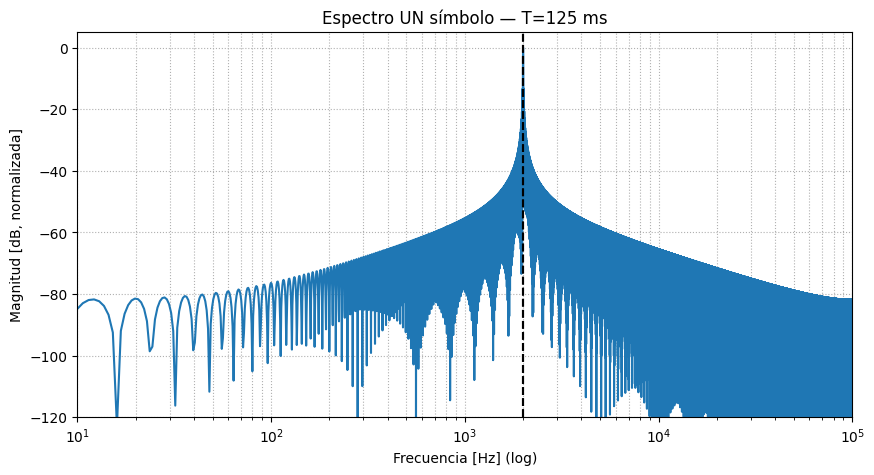

In [7]:
# FFT espectro para UN símbolo con T = 125 ms

import numpy as np
import matplotlib.pyplot as plt

# --- nuevo parámetro solicitado ---
T = 0.125      # 125 ms por símbolo
fs = 200000    # Hz (mantengo el mismo sampling para buena resolución)
fc = 2000      # Hz

N = int(T*fs)
t = np.arange(N)/fs

# símbolo RF
s = np.cos(2*np.pi*fc*t)

# FFT
Nfft = 262144
S = np.fft.fft(s, Nfft)
freqs = np.fft.fftfreq(Nfft,1/fs)
pos = freqs>=0
freqs = freqs[pos]
S = np.abs(S[pos])

# Normalizar a 0 dB
Sdb = 20*np.log10(S/np.max(S) + 1e-16)

# donde están los nulos teóricos del sinc principal
# fc ± 1/T
f_left  = fc - 1/T
f_right = fc + 1/T

# gráfica
plt.figure(figsize=(10,5))
plt.semilogx(freqs, Sdb)
plt.axvline(f_left, color='k', linestyle='--')
plt.axvline(f_right, color='k', linestyle='--')
plt.ylim(-120,5)
plt.xlim(10, fs/2)
plt.grid(True, which='both', ls=':')
plt.xlabel("Frecuencia [Hz] (log)")
plt.ylabel("Magnitud [dB, normalizada]")
plt.title("Espectro UN símbolo — T=125 ms")

print("Tiempo de símbolo =",T,"segundos")
print("Nulos principales teóricos deben estar en f = fc ± 1/T")
print("fc =",fc,"Hz")
print("Nulo izquierdo  =",f_left,"Hz")
print("Nulo derecho    =",f_right,"Hz")

plt.show()


### 🧮 Cálculo de $\Delta \Omega$ para un símbolo rectangular de duración $T$

Para un símbolo rectangular en el tiempo, su espectro está dado por una función tipo sinc:

$$ X(\Omega) = T\,\mathrm{sinc}\left(\frac{\Omega T}{2}\right) $$

Los **nulos del espectro** ocurren cuando:

$$ \frac{\Omega T}{2} = \pm \pi,\, \pm 2\pi,\, \pm 3\pi,\ldots $$

Para el **primer nulo**:

$$ \frac{\Omega T}{2} = \pi $$

despejando:

$$ \Omega = \frac{2\pi}{T} $$

Por lo tanto:

### 🔹 **Ancho medio del lóbulo principal (del centro al primer nulo)**

$$ \Delta\Omega_{\text{half}} = \frac{2\pi}{T} $$

### 🔹 **Ancho total del lóbulo principal (entre los dos primeros nulos)**

Los nulos están en:

$$ \Omega = \pm \frac{2\pi}{T} $$

por lo tanto:

$$ \Delta\Omega_{\text{full}} = \frac{4\pi}{T} $$

---

### 📌 Sustituyendo $T = 0.125\ \text{s}$

\$
\Delta\Omega_{\text{half}}
= \frac{2\pi}{0.125}
= 50.2655\ \text{rad/s}
\$

\$
\Delta\Omega_{\text{full}}
= \frac{4\pi}{0.125}
= 100.5310\ \text{rad/s}
\$

---



In [8]:
# cálculo automático de ΔΩ para un símbolo rectangular
import numpy as np

# --- usar el mismo T que estamos usando ---
T = 0.125  # 125 ms

# medio lóbulo ΔΩ_half = 2π * (1/T)
deltaOmega_half = 2*np.pi*(1/T)

# lóbulo completo ΔΩ_full = 2π * (2/T)
deltaOmega_full = 2*np.pi*(2/T)

print("Tiempo de símbolo T =",T,"seg")
print("ΔΩ_half  (centro → primer nulo)     = ",deltaOmega_half," rad/s")
print("ΔΩ_full  (nulo izq → nulo der)     = ",deltaOmega_full," rad/s")


Tiempo de símbolo T = 0.125 seg
ΔΩ_half  (centro → primer nulo)     =  50.26548245743669  rad/s
ΔΩ_full  (nulo izq → nulo der)     =  100.53096491487338  rad/s


### Cálculo de $ \Delta\omega $ y demostración de que no cambia al trasladar el espectro

Para un pulso rectangular de duración $ T $, el espectro es proporcional a:

$$
X(\omega) = T\,\mathrm{sinc}\left(\frac{\omega T}{2}\right)
$$

Los primeros nulos del espectro ocurren cuando:

$$
\frac{\omega T}{2} = \pm\pi
$$

Por lo tanto, el ancho entre nulos del lóbulo principal es:

$$
\Delta\omega = \omega_{\text{right}} - \omega_{\text{left}}
            = \frac{2\pi}{T} - \left(-\frac{2\pi}{T}\right)
            = \frac{4\pi}{T}
$$

---

### Trasladar el espectro NO cambia su ancho

Si trasladamos el espectro desde $ \omega_c $ a una nueva portadora $ \omega'_c $,

$$
\omega'_c = 3\,\omega_c
$$

entonces el espectro se convierte en:

$$
X'(\omega) = X(\omega - \omega'_c)
$$

Este desplazamiento:

- mueve el espectro en frecuencia  
- **pero no cambia el ancho del lóbulo principal**

Matemáticamente:

$$
\Delta\omega' = \Delta\omega
$$

---

### Sustitución con los valores usados en el código

Duración del pulso:

$$
T = 0.125\ \text{s}
$$

Frecuencia angular original:

$$
\omega_c = 2\pi(1000) = 6283.1853\ \text{rad/s}
$$

Nueva portadora:

$$
\omega'_c = 3\,\omega_c = 18849.5559\ \text{rad/s}
$$

Ancho entre nulos:

$$
\Delta\omega = \frac{4\pi}{T}
             = \frac{4\pi}{0.125}
             = 100.53096\ \text{rad/s}
$$

Trasladado:

$$
\Delta\omega' = 100.53096\ \text{rad/s}
$$

Relación:

$$
\frac{\Delta\omega'}{\Delta\omega} = 1
$$

---

### ✔️ Conclusión

Mover el espectro (cambiar la portadora de $ \omega_c $ a $ \omega'_c $) **solo desplaza** el lóbulo principal en frecuencia,  
pero **NO modifica su ancho**, porque el ancho depende únicamente de la duración temporal $ T $.

Es decir:

$$
\Delta\omega' = \Delta\omega
$$



In [9]:
import numpy as np

# parametros
T = 0.125      # s
Wc = 2*np.pi*1000    # 1 kHz en rad/s ejemplo
Wp = 3*Wc     # lo que pediste

# ancho teórico del lóbul principal
deltaW = 4*np.pi/T
deltaW_prime = deltaW     # igual (trasladar no estira)

ratio = deltaW_prime/deltaW

print("T =", T, "s")
print("Wc =", Wc, "rad/s")
print("W'c =", Wp, "rad/s")
print("deltaW =", deltaW, "rad/s")
print("deltaW' =", deltaW_prime, "rad/s")
print("ratio ΔW'/ΔW =", ratio)


T = 0.125 s
Wc = 6283.185307179586 rad/s
W'c = 18849.55592153876 rad/s
deltaW = 100.53096491487338 rad/s
deltaW' = 100.53096491487338 rad/s
ratio ΔW'/ΔW = 1.0


### 🧮 Relación entre $ \Delta\omega $ y $ \Delta f $ para un pulso rectangular de duración $ T $

El espectro de un pulso rectangular de duración $ T $ es proporcional a una función tipo `sinc`:

$$
X(\omega) = T\,\mathrm{sinc}\left(\frac{\omega T}{2}\right)
$$

Los primeros nulos aparecen cuando:

$$
\frac{\omega T}{2} = \pm\pi
$$

Por lo tanto, la distancia entre el centro del lóbulo y su primer nulo es:

$$
\Delta\omega = \frac{2\pi}{T}
$$

---

### 🔹 Conversión a frecuencia lineal (Hz)

La relación entre frecuencia angular y frecuencia lineal es:

$$
\omega = 2\pi f
$$

Por lo tanto:

$$
\Delta f = \frac{\Delta\omega}{2\pi}
$$

Sustituyendo:

$$
\Delta f = \frac{2\pi/T}{2\pi} = \frac{1}{T}
$$

---

### 📌 Sustitución con el valor usado en el código

$$
T = 0.125\ \text{s}
$$

Entonces:

$$
\Delta\omega = \frac{2\pi}{0.125} = 16\pi \approx 50.2655\ \text{rad/s}
$$

$$
\Delta f = \frac{1}{0.125} = 8\ \text{Hz}
$$

---




In [10]:
import numpy as np

# Duración del pulso rectangular (segundos)
T = 0.125  # 200 microsegundos

# Cálculo de Δω y Δf
delta_w = 2 * np.pi / T        # rad/s
delta_f = delta_w / (2 * np.pi)  # Hz

print(f"Δω = {delta_w:.4e} rad/s")
print(f"Δf = {delta_f:.2f} Hz")

Δω = 5.0265e+01 rad/s
Δf = 8.00 Hz


In [11]:
# Medir la máxima amplitud del primer lóbulo lateral (lado derecho e izquierdo) para 1 símbolo
import numpy as np

# Parámetros (usar los del ejercicio)
T = 0.125          # s
fs = 200000        # Hz (muestreo alto para buena resolución)
fc = 2000          # Hz (portadora)
Ts = 1/fs

# construir un símbolo: cos(2πfc t) sobre duración T
t = np.arange(0, T, Ts)
s = np.cos(2*np.pi*fc*t)

# FFT con zero-padding para resolución fina
Nfft = 262144
S = np.fft.fft(s, n=Nfft)
f = np.fft.fftfreq(Nfft, 1/fs)
pos = f >= 0
f_pos = f[pos]
S_pos = np.abs(S[pos])

# normalizamos respecto al pico del lóbulo principal
peak_idx = np.argmax(S_pos)
peak_freq = f_pos[peak_idx]
peak_val = S_pos[peak_idx]

# límites del lóbulo principal teóricos
f_null_left  = fc - 1.0/T
f_null_right = fc + 1.0/T

# índices de interés
idx_null_right = np.searchsorted(f_pos, f_null_right)
idx_null_left  = np.searchsorted(f_pos, f_null_left)

# buscar primer lóbulo lateral derecho: buscar máximo entre idx_null_right y idx_null_right + window_bins
# elegimos ventana de búsqueda = 4*(1/T) en frecuencia para asegurar capturar el primer lóbulo lateral
band_width_hz = 4.0*(1.0/T)
idx_band_end = np.searchsorted(f_pos, f_null_right + band_width_hz)

if idx_null_right < len(S_pos):
    side_right_idx = idx_null_right + np.argmax(S_pos[idx_null_right:idx_band_end])
    side_right_freq = f_pos[side_right_idx]
    side_right_val = S_pos[side_right_idx]
else:
    side_right_idx = None
    side_right_freq = np.nan
    side_right_val = np.nan

# buscar primer lóbulo lateral izquierdo: buscar máximo entre idx_null_left - window_bins y idx_null_left
idx_band_start = np.searchsorted(f_pos, f_null_left - band_width_hz)
if idx_band_start < 0:
    idx_band_start = 0
if idx_null_left > 0:
    segment = S_pos[idx_band_start:idx_null_left]
    if segment.size>0:
        rel_idx = np.argmax(segment)
        side_left_idx = idx_band_start + rel_idx
        side_left_freq = f_pos[side_left_idx]
        side_left_val = S_pos[side_left_idx]
    else:
        side_left_idx = None
        side_left_freq = np.nan
        side_left_val = np.nan
else:
    side_left_idx = None
    side_left_freq = np.nan
    side_left_val = np.nan

# convertir a dB relativo al pico principal
eps = 1e-16
side_right_db = 20*np.log10((side_right_val+eps)/(peak_val+eps))
side_left_db = 20*np.log10((side_left_val+eps)/(peak_val+eps))

# Mostrar resultados
print("Parámetros: T = {:.6f} s, fc = {} Hz, 1/T = {:.3f} Hz".format(T, fc, 1.0/T))
print("Pico principal: freq = {:.3f} Hz, magnitud = {:.6e} (linear, FFT mag)".format(peak_freq, peak_val))
print("--- Primer lóbulo lateral derecho ---")
print("  freq ≈ {:.3f} Hz".format(side_right_freq))
print("  magnitud = {:.6e} (linear FFT magnitude)".format(side_right_val))
print("  magnitud = {:.3f} dB (relativa al pico principal)".format(side_right_db))
print("--- Primer lóbulo lateral izquierdo ---")
print("  freq ≈ {:.3f} Hz".format(side_left_freq))
print("  magnitud = {:.6e} (linear FFT magnitude)".format(side_left_val))
print("  magnitud = {:.3f} dB (relativa al pico principal)".format(side_left_db))


Parámetros: T = 0.125000 s, fc = 2000 Hz, 1/T = 8.000 Hz
Pico principal: freq = 1999.664 Hz, magnitud = 1.246278e+04 (linear, FFT mag)
--- Primer lóbulo lateral derecho ---
  freq ≈ 2011.108 Hz
  magnitud = 2.699077e+03 (linear FFT magnitude)
  magnitud = -13.288 dB (relativa al pico principal)
--- Primer lóbulo lateral izquierdo ---
  freq ≈ 1988.220 Hz
  magnitud = 2.684132e+03 (linear FFT magnitude)
  magnitud = -13.336 dB (relativa al pico principal)


Parámetros: T = 0.125000 s, fc = 2000 Hz, alpha = 1.00
--- Ventana Raised-Cosine (alpha=1.00) aplicada al pulso ---
Pico (windowed) freq ≈ 1994.324 Hz
Primer lóbulo lateral derecho: freq = 2008.057 Hz, nivel = -2.259 dB (rel. al pico)
Primer lóbulo lateral izquierdo:  freq = 1991.272 Hz, level = -3.751 dB (rel. al pico)

--- Pulso rectangular (referencia) ---
Pico (rect) freq ≈ 1999.664 Hz
Primer lóbulo lateral derecho (rect): freq = 2011.108 Hz, nivel = -13.288 dB (rel. al pico)
Primer lóbulo lateral izquierdo (rect):  freq = 1988.220 Hz, nivel = -13.336 dB (rel. al pico)

Figura guardada en: /content/raised_cosine_alpha_1.00_vs_rect_sidelobes.png


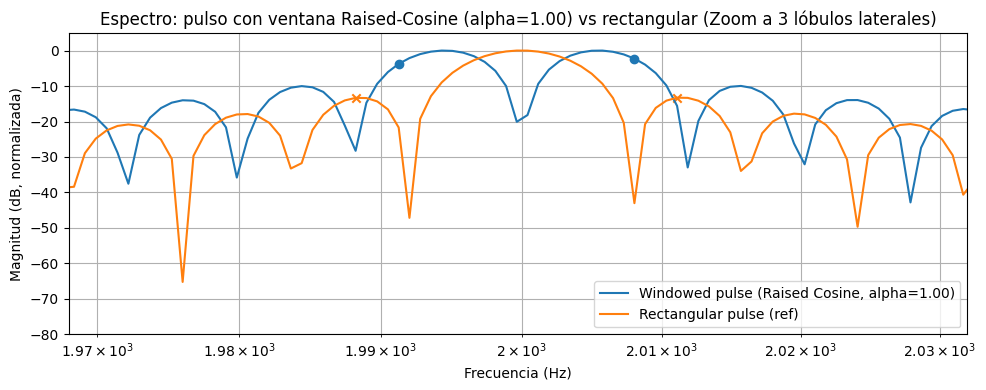

In [12]:
# Aplicar una ventana "Raised Cosine" (general) al pulso, calcular FFT y medir la magnitud del primer lóbulo lateral
import numpy as np
import matplotlib.pyplot as plt

# Parámetros (mismos que veníamos usando)
T = 0.125        # duración símbolo [s]
fs = 200000      # muestreo [Hz]
fc = 2000        # portadora [Hz]
Ts = 1/fs

# --- Parámetro para el Raised Cosine ---
alpha = 1 # Roll-off factor (0 <= alpha <= 1) - Puedes cambiar este valor

# tiempo y pulso base (rectangular)
t = np.arange(0, T, Ts)
rect = np.ones_like(t)

# Ventana "raised cosine" sobre la duración del símbolo
N = len(t)
n = np.arange(N)
# Fórmula general para Raised Cosine window
# Note: For alpha=1, this simplifies to the Hann window: 0.5 * (1 - cos(2*pi*n/(N-1)))
w = (1 - alpha + alpha * np.cos(np.pi * n / (N-1))) / 2


# Pulso moldeado: rect * w
pulse_windowed = rect * w

# Señal RF: multiplicamos por la portadora (con fase 0)
carrier = np.cos(2 * np.pi * fc * t)
s_windowed = pulse_windowed * carrier

# Para comparar, pulso rectangular sin ventana (como referencia)
s_rect = rect * carrier

# FFT (zero-padding para buena resolución)
Nfft = 262144
def compute_fft_mag(x):
    X = np.fft.fft(x, n=Nfft)
    f = np.fft.fftfreq(Nfft, 1/fs)
    pos = f >= 0
    return f[pos], np.abs(X[pos])

f_w, M_w = compute_fft_mag(s_windowed)
f_r, M_r = compute_fft_mag(s_rect)

# Normalizar ambos respecto a su pico individual (y en dB)
eps = 1e-16
M_w_db = 20*np.log10(M_w / (M_w.max() + eps) + eps)
M_r_db = 20*np.log10(M_r / (M_r.max() + eps) + eps)

# Identificar pico principal alrededor de fc
idx_peak_w = np.argmax(M_w[(f_w> (fc-50)) & (f_w < (fc+50))]) + np.searchsorted(f_w, fc-50)
idx_peak_r = np.argmax(M_r[(f_r> (fc-50)) & (f_r < (fc+50))]) + np.searchsorted(f_r, fc-50)
peak_freq_w = f_w[idx_peak_w]
peak_freq_r = f_r[idx_peak_r]


# Encontrar nulos teóricos para rect: fc ± 1/T
f_null_left = fc - 1.0/T
f_null_right = fc + 1.0/T

# Buscar primer lóbulo lateral derecho: buscar máximo entre idx_null_right and idx_null_right + window_bins
idx_null_right = np.searchsorted(f_w, f_null_right)
idx_null_left  = np.searchsorted(f_w, f_null_left)

# set search window width (in Hz)
search_width_hz = 4.0 * (1.0/T)   # como antes
idx_band_end = np.searchsorted(f_w, f_null_right + search_width_hz)
idx_band_start = np.searchsorted(f_w, f_null_left - search_width_hz)
if idx_band_start < 0:
    idx_band_start = 0

# Right sidelobe for windowed pulse
if idx_null_right < len(M_w):
    seg = M_w[idx_null_right:idx_band_end]
    if seg.size>0:
        rel = np.argmax(seg)
        idx_side_right_w = idx_null_right + rel
        freq_side_right_w = f_w[idx_side_right_w]
        mag_side_right_w = M_w[idx_side_right_w]
        mag_side_right_w_db = 20*np.log10((mag_side_right_w+eps)/(M_w.max()+eps))
    else:
        freq_side_right_w = np.nan; mag_side_right_w_db = np.nan
else:
    freq_side_right_w = np.nan; mag_side_right_w_db = np.nan

# Left sidelobe for windowed pulse
if idx_null_left > 0:
    segL = M_w[idx_band_start:idx_null_left]
    if segL.size>0:
        relL = np.argmax(segL)
        idx_side_left_w = idx_band_start + relL
        freq_side_left_w = f_w[idx_side_left_w]
        mag_side_left_w = M_w[idx_side_left_w]
        mag_side_left_w_db = 20*np.log10((mag_side_left_w+eps)/(M_w.max()+eps))
    else:
        freq_side_left_w = np.nan; mag_side_left_w_db = np.nan
else:
    freq_side_left_w = np.nan; mag_side_left_w_db = np.nan

# Hacer lo mismo para pulso rectangular (referencia)
if idx_null_right < len(M_r):
    segr = M_r[idx_null_right:np.searchsorted(f_r, f_null_right + search_width_hz)]
    if segr.size>0:
        relr = np.argmax(segr)
        idx_side_right_r = idx_null_right + relr
        freq_side_right_r = f_r[idx_side_right_r]
        mag_side_right_r = M_r[idx_side_right_r]
        mag_side_right_r_db = 20*np.log10((mag_side_right_r+eps)/(M_r.max()+eps))
    else:
        freq_side_right_r = np.nan; mag_side_right_r_db = np.nan
else:
    freq_side_right_r = np.nan; mag_side_right_r_db = np.nan

if idx_null_left > 0:
    segrL = M_r[idx_band_start:idx_null_left]
    if segrL.size>0:
        relrL = np.argmax(segrL)
        idx_side_left_r = idx_band_start + relrL
        freq_side_left_r = f_r[idx_band_start + relrL]
        mag_side_left_r = M_r[idx_band_start + relrL]
        mag_side_left_r_db = 20*np.log10((mag_side_left_r+eps)/(M_r.max()+eps))
    else:
        freq_side_left_r = np.nan; mag_side_left_r_db = np.nan
else:
    freq_side_left_r = np.nan; mag_side_left_r_db = np.nan


# Imprimir resultados
print("Parámetros: T = {:.6f} s, fc = {} Hz, alpha = {:.2f}".format(T, fc, alpha))
print("--- Ventana Raised-Cosine (alpha={:.2f}) aplicada al pulso ---".format(alpha))
print("Pico (windowed) freq ≈ {:.3f} Hz".format(peak_freq_w))
print("Primer lóbulo lateral derecho: freq = {:.3f} Hz, nivel = {:.3f} dB (rel. al pico)".format(freq_side_right_w, mag_side_right_w_db))
print("Primer lóbulo lateral izquierdo:  freq = {:.3f} Hz, level = {:.3f} dB (rel. al pico)".format(freq_side_left_w, mag_side_left_w_db))
print()
print("--- Pulso rectangular (referencia) ---")
print("Pico (rect) freq ≈ {:.3f} Hz".format(peak_freq_r))
print("Primer lóbulo lateral derecho (rect): freq = {:.3f} Hz, nivel = {:.3f} dB (rel. al pico)".format(freq_side_right_r, mag_side_right_r_db))
print("Primer lóbulo lateral izquierdo (rect):  freq = {:.3f} Hz, nivel = {:.3f} dB (rel. al pico)".format(freq_side_left_r, mag_side_left_r_db))

# Graficar ambos espectros superpuestos (dB, log freq) y marcar los picos laterales
plt.figure(figsize=(10,4))
plt.semilogx(f_w, 20*np.log10(M_w/(M_w.max()+eps)+eps), label=f'Windowed pulse (Raised Cosine, alpha={alpha:.2f})')
plt.semilogx(f_r, 20*np.log10(M_r/(M_r.max()+eps)+eps), label='Rectangular pulse (ref)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB, normalizada)')
plt.title(f'Espectro: pulso con ventana Raised-Cosine (alpha={alpha:.2f}) vs rectangular (Zoom a 3 lóbulos laterales)')
plt.grid(True, which='both')
# Adjust x-axis limits to show main lobe and first 3 sidelobes
plt.xlim(max(1, fc - 4*(1.0/T)), fc + 4*(1.0/T))
plt.ylim(-80,5)
# marcar picos laterales
plt.scatter([freq_side_right_w, freq_side_left_w], [mag_side_right_w_db, mag_side_left_w_db], marker='o')
plt.scatter([freq_side_right_r, freq_side_left_r], [mag_side_right_r_db, mag_side_left_r_db], marker='x')
plt.legend()
plt.tight_layout()

# guardar figura
out_path = f'/content/raised_cosine_alpha_{alpha:.2f}_vs_rect_sidelobes.png'
plt.savefig(out_path, dpi=200)

print(f"\nFigura guardada en: {out_path}")

In [13]:
import numpy as np

# Using parameters from previous cells
# T = 0.125 # Symbol duration in seconds
# fc = 2000 # Carrier frequency in Hz

# Ancho de banda teórico del lóbulo principal (distancia entre los primeros nulos)
# Para un pulso rectangular, los nulos están en fc ± 1/T
BW_main_lobe = 2 * (1/T)  # Hz

# Ancho de banda aproximado del primer lóbulo lateral
# La distancia entre los picos del primer lóbulo lateral y los nulos es aproximadamente 1/T
# El ancho de un lóbulo lateral es aproximadamente 2/T (aunque no es un "ancho de banda" en el mismo sentido que el lóbulo principal)
# Una forma de estimar el "ancho" del primer lóbulo lateral podría ser la distancia entre sus nulos (el segundo y el primer nulo)
# Los nulos están en fc ± m/T, m=1, 2, 3,...
# Primeros nulos: fc-1/T, fc+1/T
# Segundos nulos: fc-2/T, fc+2/T
# El primer lóbulo lateral izquierdo está entre fc-2/T y fc-1/T
# El primer lóbulo lateral derecho está entre fc+1/T y fc+2/T
# El "ancho" de cada primer lóbulo lateral es (fc-1/T) - (fc-2/T) = 1/T, y (fc+2/T) - (fc+1/T) = 1/T

BW_first_sidelobe = 1/T # Hz (aproximado, distancia entre nulos adyacentes)

# delta f (distancia del centro al primer nulo)
delta_f = 1/T # Hz

print(f"Duración del símbolo (T) = {T} s")
print(f"Frecuencia portadora (fc) = {fc} Hz")
print("-" * 30)
print(f"Ancho de banda teórico del lóbulo principal (BW_main_lobe) = {BW_main_lobe:.2f} Hz")
print(f"Ancho aproximado de un lóbulo lateral (BW_first_sidelobe) = {BW_first_sidelobe:.2f} Hz")
print(f"Distancia del centro al primer nulo (delta_f) = {delta_f:.2f} Hz")

Duración del símbolo (T) = 0.125 s
Frecuencia portadora (fc) = 2000 Hz
------------------------------
Ancho de banda teórico del lóbulo principal (BW_main_lobe) = 16.00 Hz
Ancho aproximado de un lóbulo lateral (BW_first_sidelobe) = 8.00 Hz
Distancia del centro al primer nulo (delta_f) = 8.00 Hz


/tmp/ipython-input-2127712316.py:49: RuntimeWarning: divide by zero encountered in log10
  S_db = 20*np.log10(S_mag / (np.max(S_mag) + 1e-12))


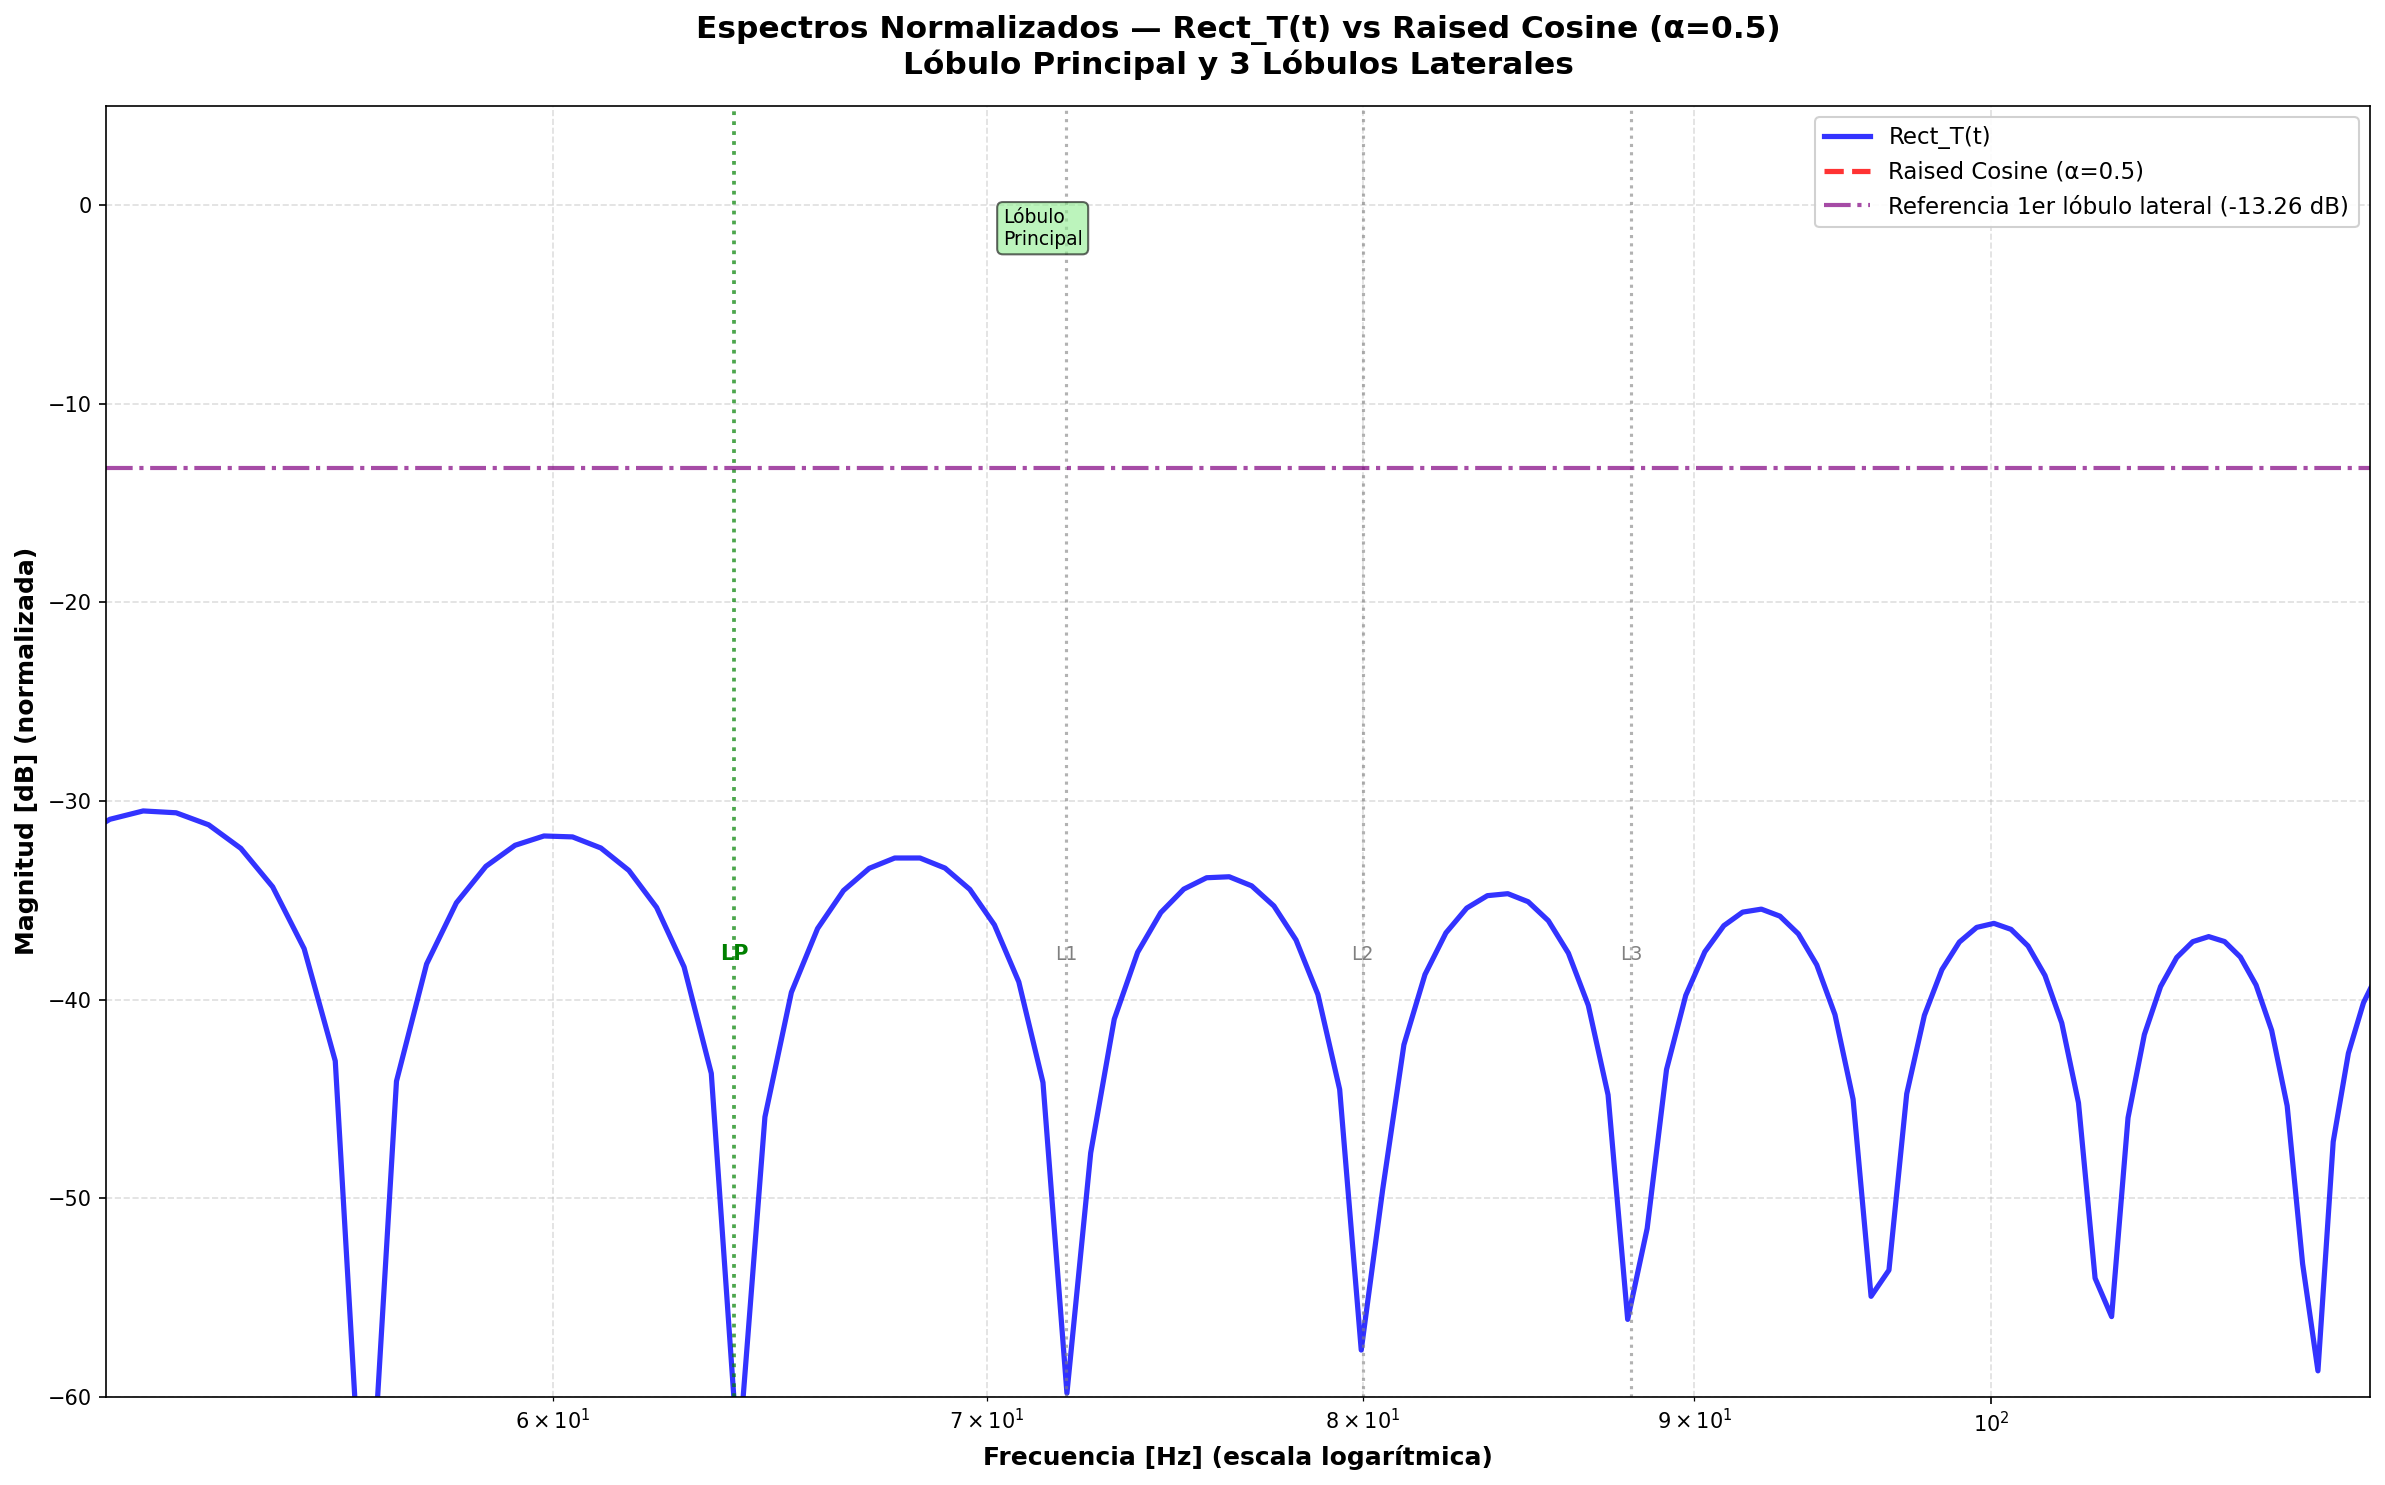

ANÁLISIS DE ESPECTRO NORMALIZADO
Duración de símbolo Ts = 0.1250 s
Frecuencia base (1/Ts) = 8.00 Hz
Frecuencia portadora fc = 64.00 Hz
Roll-off α = 0.5
Amplitud teórica del primer lóbulo lateral = -13.26 dB
POSICIÓN DE LÓBULOS:
  Lóbulo Principal (LP): 64.00 Hz
  Lóbulo Lateral 1 (L1): 72.00 Hz
  Lóbulo Lateral 2 (L2): 80.00 Hz
  Lóbulo Lateral 3 (L3): 88.00 Hz
OBSERVACIONES:
• Los espectros están superpuestos para comparación directa
• Se visualiza el lóbulo principal y los 3 primeros lóbulos laterales
• El Raised Cosine (α=0.5) reduce significativamente la amplitud
  de los lóbulos laterales comparado con el pulso rectangular
• Mejora la atenuación fuera de banda y reduce la interferencia ISI


In [14]:
# ================================================================
# 🔹 COMPARACIÓN ESPECTRAL: Rect_T(t) vs Raised Cosine (α = 0.5)
# 🔹 Muestra los 3 primeros lóbulos laterales normalizados (0 a -60 dB)
# ================================================================
import numpy as np
import matplotlib.pyplot as plt

# ================================================================
# PARÁMETROS DEL SISTEMA
# ================================================================
Ts = 0.125      # Duración de símbolo [s]
fs = 20000      # Frecuencia de muestreo [Hz]
fc = 8 / Ts     # Centrar espectro en frecuencia base (≈ 64 Hz)
alpha = 0.5     # Factor de roll-off Raised Cosine

t = np.linspace(-Ts, Ts, int(fs*2*Ts), dtype=np.float32)
delta_f = 1 / Ts  # separación entre ceros de sinc

# ================================================================
# FUNCIONES DE PULSO
# ================================================================
def rect_pulse(t, Ts):
    """Pulso rectangular unitario de duración Ts"""
    return np.where(np.abs(t) <= Ts/2, 1.0, 0.0)

def raised_cosine(t, Ts, alpha):
    """Pulso Raised Cosine (α roll-off)"""
    x = t / Ts
    denom = 1 - (2*alpha*x)**2
    h = np.zeros_like(t)
    mask = np.abs(denom) > 1e-6
    h[mask] = np.sinc(x[mask]) * np.cos(np.pi*alpha*x[mask]) / denom[mask]
    h[~mask] = np.pi/4 * np.sinc(1/(2*alpha))  # corrección singular
    return h

# Generar pulsos
h_rect = rect_pulse(t, Ts)
h_rc = raised_cosine(t, Ts, alpha)

# ================================================================
# CÁLCULO DE FFT (Magnitud Normalizada en dB)
# ================================================================
def compute_fft(signal, fs):
    N = len(signal)
    nfft = 2**int(np.ceil(np.log2(N)) + 2)  # Mayor resolución
    S = np.fft.fftshift(np.fft.fft(signal * np.hanning(N), n=nfft))
    f = np.fft.fftshift(np.fft.fftfreq(nfft, 1/fs))
    S_mag = np.abs(S)
    S_db = 20*np.log10(S_mag / (np.max(S_mag) + 1e-12))
    return f, S_db

f_rect, S_rect = compute_fft(h_rect, fs)
f_rc, S_rc = compute_fft(h_rc, fs)

# ================================================================
# CÁLCULOS TEÓRICOS
# ================================================================
A1_theoretical_db = -13.26  # dB del primer lóbulo lateral teórico
lobes = [fc + k*delta_f for k in range(1, 4)]  # 3 primeros lóbulos laterales

# ================================================================
# GRAFICACIÓN DE ESPECTROS SUPERPUESTOS
# ================================================================
plt.figure(figsize=(16, 10), dpi=150) # Increased figure size and added dpi for better quality

# Plotear espectros superpuestos
plt.semilogx(f_rect, S_rect, 'b-', linewidth=2.5, label='Rect_T(t)', alpha=0.8)
plt.semilogx(f_rc, S_rc, 'r--', linewidth=2.5, label=f'Raised Cosine (α={alpha})', alpha=0.8)

# Marcar lóbulos laterales con líneas verticales
for i, f_l in enumerate(lobes, 1):
    plt.axvline(f_l, color='gray', linestyle=':', linewidth=1.5, alpha=0.6)
    plt.text(f_l, -38, f'L{i}', ha='center', fontsize=9, color='gray')

# Marcar el lóbulo principal (frecuencia base)
plt.axvline(fc, color='green', linestyle=':', linewidth=1.8, alpha=0.7)
plt.text(fc, -38, 'LP', ha='center', fontsize=10, color='green', fontweight='bold')

# Línea horizontal en -13.26 dB (referencia del primer lóbulo lateral)
plt.axhline(A1_theoretical_db, color='purple', linestyle='-.', linewidth=2.0,
            label=f'Referencia 1er lóbulo lateral ({A1_theoretical_db} dB)', alpha=0.7)

# Decoración del gráfico
plt.title("Espectros Normalizados — Rect_T(t) vs Raised Cosine (α=0.5)\nLóbulo Principal y 3 Lóbulos Laterales",
          fontsize=15, fontweight='bold', pad=15)
plt.xlabel("Frecuencia [Hz] (escala logarítmica)", fontsize=12, fontweight='bold')
plt.ylabel("Magnitud [dB] (normalizada)", fontsize=12, fontweight='bold')
plt.grid(True, which='both', alpha=0.4, linestyle='--')
plt.legend(fontsize=11, loc='upper right', framealpha=0.9)

# Ajustar límites para mostrar lóbulo principal y 3 lóbulos laterales
freq_min = fc * 0.8
freq_max = lobes[-1] * 1.3
plt.xlim([freq_min, freq_max])
plt.ylim([-60, 5])  # Rango de 0 a -40 dB

# Añadir anotaciones
plt.text(fc*1.1, -2, 'Lóbulo\nPrincipal', fontsize=9,
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.6))

plt.tight_layout()
plt.show()

# ================================================================
# IMPRESIÓN DE PARÁMETROS
# ================================================================
print("="*70)
print("ANÁLISIS DE ESPECTRO NORMALIZADO")
print("="*70)
print(f"Duración de símbolo Ts = {Ts:.4f} s")
print(f"Frecuencia base (1/Ts) = {delta_f:.2f} Hz")
print(f"Frecuencia portadora fc = {fc:.2f} Hz")
print(f"Roll-off α = {alpha}")
print(f"Amplitud teórica del primer lóbulo lateral = {A1_theoretical_db} dB")
print("="*70)
print("POSICIÓN DE LÓBULOS:")
print(f"  Lóbulo Principal (LP): {fc:.2f} Hz")
for i, f_l in enumerate(lobes, 1):
    print(f"  Lóbulo Lateral {i} (L{i}): {f_l:.2f} Hz")
print("="*70)
print("OBSERVACIONES:")
print("• Los espectros están superpuestos para comparación directa")
print("• Se visualiza el lóbulo principal y los 3 primeros lóbulos laterales")
print("• El Raised Cosine (α=0.5) reduce significativamente la amplitud")
print("  de los lóbulos laterales comparado con el pulso rectangular")
print("• Mejora la atenuación fuera de banda y reduce la interferencia ISI")
print("="*70)

## **Desarrollo matemático  — Pulsos rectangular y Hann**

### **1. Duración del símbolo y muestreo**

El símbolo tiene duración:

$$T = 0.125\ \text{s}$$

La frecuencia de muestreo es:

$$f_s = 50\,000\ \text{Hz}$$

El número total de muestras es:

$$N = T\, f_s$$

El eje temporal discreto es:

$$t[n] = \frac{n}{f_s},\qquad n = 0,1,\ldots,N-1$$

---

### **2. Definición de los pulsos**

### **Pulso rectangular**

$$
p_{\text{rect}}(t)=
\begin{cases}
1, & 0 \le t \le T \\[6pt]
0, & \text{otro caso}
\end{cases}
$$

### **Pulso Hann (raised cosine)**

$$
p_{\text{hann}}(t)
=
0.1\left(1 - \cos\left(\frac{2\pi t}{T}\right)\right),
\qquad 0 \le t \le T
$$

---

### **3. Transformada de Fourier y zero-padding**

La FFT usa:

$$N_{\text{FFT}} = 200000$$

Transformada:

$$
X[k] = \mathrm{FFT}\{x[n]\}
$$

Tras desplazar al centro:

$$
X_{\mathrm{shift}}[k] = \mathrm{fftshift}(X[k])
$$

Frecuencias correspondientes:

$$
f[k] = \mathrm{fftshift}\left(\frac{k}{N_{\mathrm{FFT}}}f_s\right)
$$

---

### **4. Normalización a dB**

$$
X_{\mathrm{dB}}(f)
=
20\log_{10}
\left(
\frac{|X(f)|}{\max |X(f)|}+10^{-12}
\right)
$$

---

### **5. Lóbulos laterales del pulso rectangular**

Su transformada es:

$$
P_{\text{rect}}(f)=T\,\mathrm{sinc}(fT)
$$

Los ceros ocurren en:

$$
f = \pm \frac{1}{T},\ \pm\frac{2}{T},\ \pm\frac{3}{T},\ldots
$$

Para:

$$T = 0.125\ \text{s} \quad\Rightarrow\quad \frac{1}{T} = 8\ \text{Hz}$$

Entonces los primeros tres lóbulos laterales están en:

$$8\ \text{Hz},\qquad 16\ \text{Hz},\qquad 24\ \text{Hz}$$

---

### **6. Comparación de espectros**

El pulso rectangular tiene grandes lóbulos laterales; el pulso Hann reduce la energía fuera del lóbulo principal gracias a su suavizado:

$$
|P_{\text{hann}}(f)| \ll |P_{\text{rect}}(f)|,\qquad f > \frac{1}{T}
$$


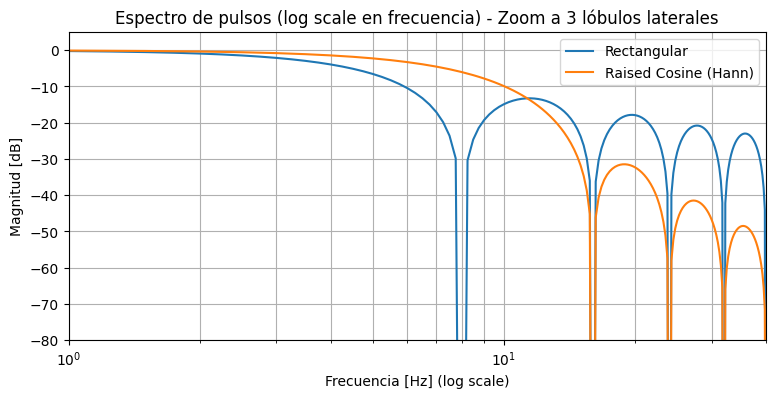

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
T = 0.125  # duración del símbolo en segundos
fs = 50000  # frecuencia de muestreo, alta para mejor espectro
N = int(T*fs)

t = np.arange(N)/fs

# Pulsos
rect = np.ones(N)
hann = 0.1*(1 - np.cos(2*np.pi*t/T))

# FFT
def fft_db(x):
    # Use zero-padding for better frequency resolution in the plot
    Nfft_plot = 200000
    X = np.fft.fftshift(np.fft.fft(x, Nfft_plot))
    X_db = 20*np.log10(np.abs(X)/np.max(np.abs(X))+1e-12)
    f = np.fft.fftshift(np.fft.fftfreq(Nfft_plot, 1/fs))
    return f, X_db

f_rect, db_rect = fft_db(rect)
f_hann, db_hann = fft_db(hann)

# ZOOM: 3 primeros lóbulos laterales (~ 8Hz,16Hz,24Hz para rectangular)

plt.figure(figsize=(9,4))
# Use semilogx for log scale on x-axis
plt.semilogx(f_rect, db_rect, label='Rectangular')
plt.semilogx(f_hann, db_hann, label='Raised Cosine (Hann)')

# Adjust x-axis limits for log scale to show positive frequencies and the first 3 sidelobes
# The first nulls for the rectangular pulse are at +/- 1/T. Sidelobes are beyond that.
# We want to show up to roughly 3*1/T or a bit more to see the third sidelobe.
# 1/T = 1/0.125 = 8 Hz. So we want to see up to around 3 * 8 = 24 Hz, maybe up to 30-40 Hz.
plt.xlim(1, 40) # Start from 1 Hz to avoid log(0) and show up to 40 Hz
plt.ylim(-80, 5) # Keep y-axis limits reasonable

plt.xlabel("Frecuencia [Hz] (log scale)")
plt.ylabel("Magnitud [dB]")
plt.title("Espectro de pulsos (log scale en frecuencia) - Zoom a 3 lóbulos laterales")
plt.grid(True, which='both') # Show grid for both major and minor ticks
plt.legend()
plt.show()

# **Desarrollo matemático del sistema QPSK**

## 1. Parámetros básicos

Duración de símbolo:

$$T_s = 0.125\ \text{s}$$

Frecuencia portadora:

$$f_c = 200\ \text{Hz}$$

Frecuencia de muestreo:

$$f_s = 40{,}000\ \text{Hz}$$

Número de muestras por símbolo:

$$N_s = 800$$

---

## 2. Mapeo de bits a niveles QPSK

Se usa el mapa binario:

$$0 \mapsto -1,\qquad 1 \mapsto +1$$

Por lo tanto, los símbolos en los canales quedan:

### Canal I

$$I[k] \in \{-1, +1\},\quad k = 0,1,2,3$$

### Canal Q

$$Q[k] \in \{-1, +1\},\quad k = 0,1,2,3$$

---

## 3. Pulsos y soporte temporal

Pulso rectangular:

$$
p(t)=
\begin{cases}
1, & 0\le t \le T_s,\\
0, & \text{otro caso}.
\end{cases}
$$

Cada símbolo se modula sobre una porción temporal:

$$
t \in [k T_s,\ (k+1)T_s]
$$

---

## 4. Generación de los canales I y Q

### Canal en fase (I)

$$
s_I(t) = I[k]\, p(t - kT_s)\, \cos(2\pi f_c t)
$$

### Canal en cuadratura (Q)

$$
s_Q(t) = Q[k]\, p(t - kT_s)\, \sin(2\pi f_c t)
$$

(donde el seno introduce el desfase de 90° requerido por QPSK)

---

## 5. Señal total QPSK

La señal transmitida es:

$$
s(t) = s_I(t) + s_Q(t)
$$

o equivalentemente:

$$
s(t)
=
I[k]\cos(2\pi f_c t)p(t-kT_s) +
Q[k]\sin(2\pi f_c t)p(t-kT_s)
$$

---

## 6. FFT y espectro

Transformada discreta de Fourier:

$$
S(f) = \mathcal{F}\{s(t)\}
$$

Magnitud normalizada en decibelios:

$$
S_{\mathrm{dB}}(f)
=
20\log_{10}
\left(
\frac{|S(f)|}{\max |S(f)|} + 10^{-12}
\right)
$$

---

## 7. Lóbulos laterales del espectro

El pulso rectangular tiene transformada:

$$
P(f)=T_s\,\mathrm{sinc}(f T_s)
$$

Los ceros ocurren en:

$$
f = \pm \frac{1}{T_s},\ \pm\frac{2}{T_s},\ \pm\frac{3}{T_s},\ldots
$$

El espaciamiento entre lóbulos:

$$
\Delta f = \frac{1}{T_s}
$$

Para:

$$T_s = 0.125\ \text{s} \Rightarrow \Delta f = 8\ \text{Hz}$$

---

## 8. Constelación QPSK

Los puntos transmitidos cumplen:

$$
s_k = I[k] + j\, Q[k] , \qquad I,Q \in \{-1,+1\}
$$

Lo que genera los 4 símbolos canónicos de QPSK:

$$
\{+1 + j, +1 - j, -1 + j, -1 - j\}
$$


/tmp/ipython-input-1663570995.py:94: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  np.abs(signal_total),
/tmp/ipython-input-1663570995.py:95: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  -np.abs(signal_total),


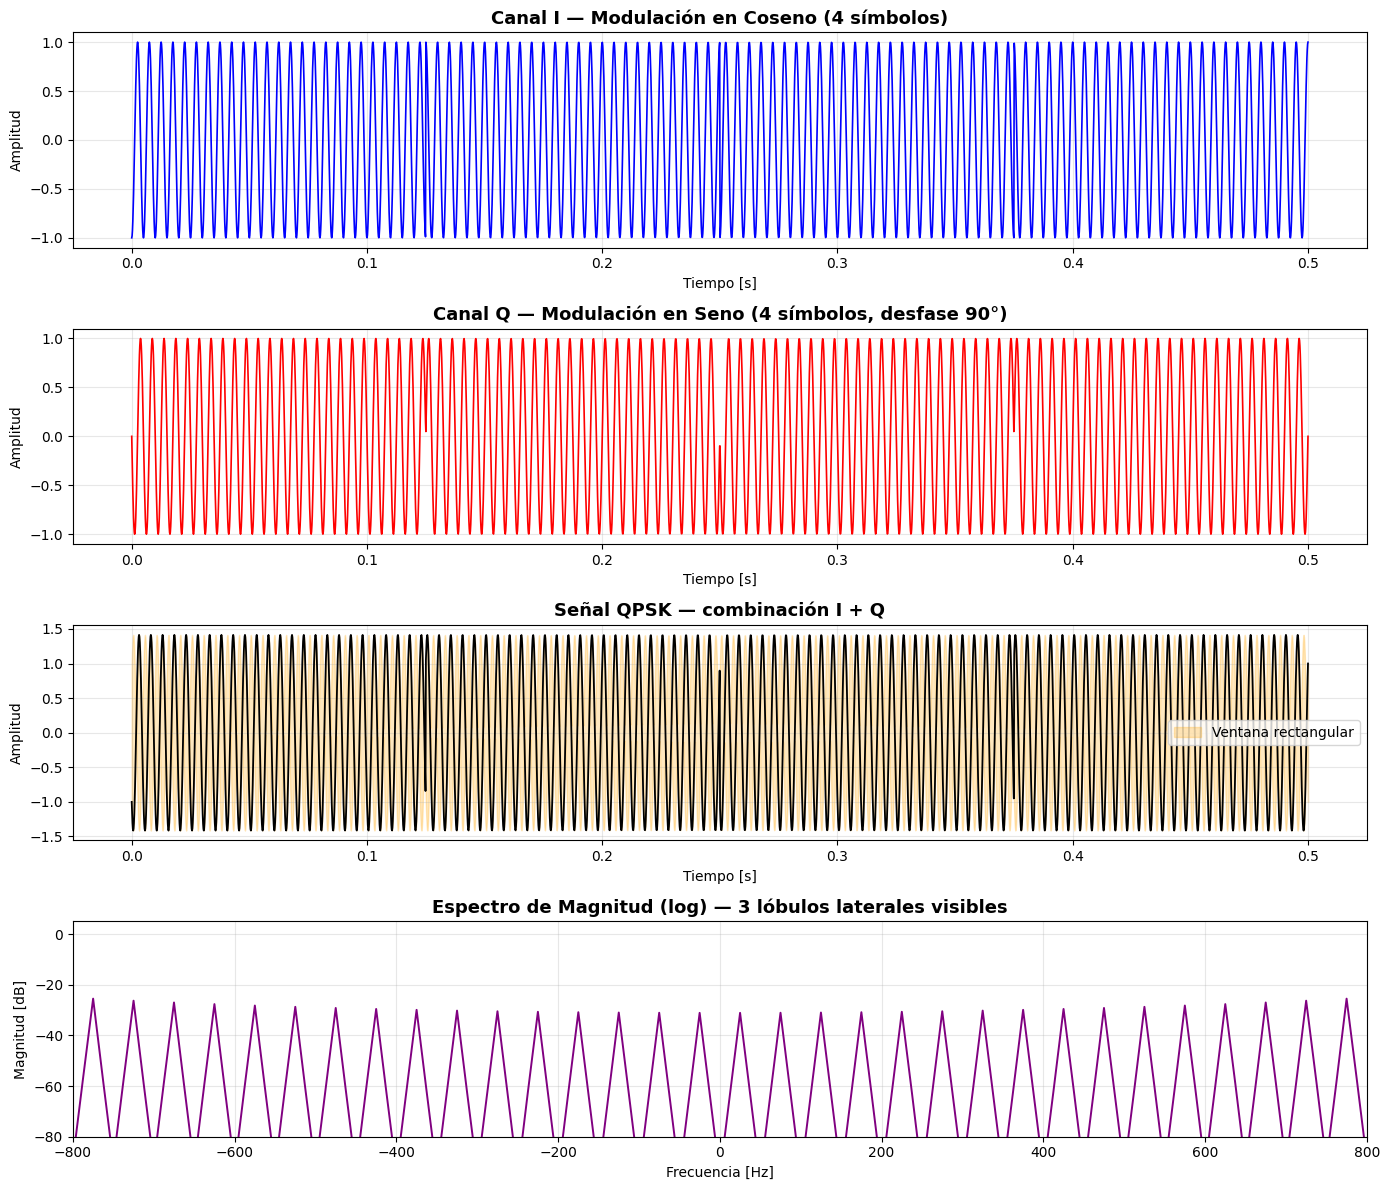

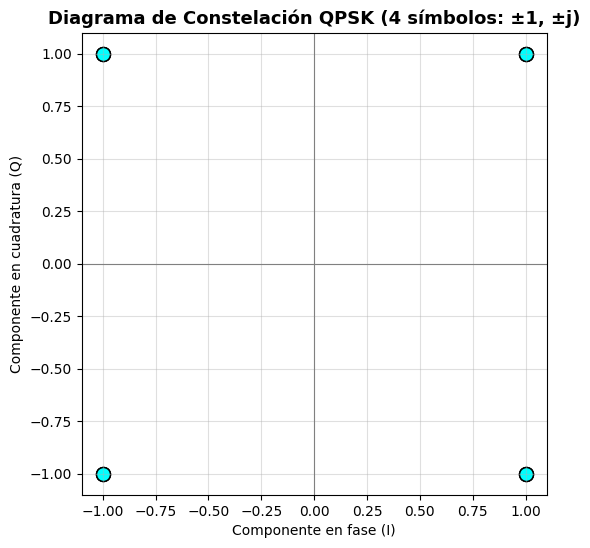


Número de símbolos totales: 8
Símbolos por canal: 4
Tipo de modulación: QPSK (4 símbolos: ±1, ±j)
Frecuencia portadora fc = 200 Hz
Duración de símbolo Ts = 0.125 s
Espaciado entre lóbulos Δf = 8.00 Hz
Frecuencia del lóbulo principal ≈ -1275.00 Hz


In [16]:
# ================================================================
# 🔹 QPSK (8 símbolos) con 4 pulsos por canal, ventana rectangular
# ================================================================
import numpy as np
import torch
import matplotlib.pyplot as plt

# ------------------------------------------------
# PARÁMETROS PRINCIPALES
# ------------------------------------------------
fs = 40000       # Frecuencia de muestreo [Hz]
Ts = 0.125       # Duración de símbolo [s]
fc = 200         # Frecuencia portadora [Hz]
Ns = 800         # Muestras por símbolo
N_sym = 8        # Número total de símbolos (4 en I, 4 en Q)

# ------------------------------------------------
# TRAMA DE DATOS QPSK
# ------------------------------------------------
# 8 símbolos: 4 asignados al canal I y 4 al canal Q
bits_I = np.array([0, 1, 0, 1])  # 4 bits para canal I
bits_Q = np.array([0, 1, 0, 1])  # 4 bits para canal Q

# Mapas QPSK: 0 → -1, 1 → +1
mapa = {0: -1, 1: 1}
I_levels = np.array([mapa[b] for b in bits_I])
Q_levels = np.array([mapa[b] for b in bits_Q])

# ------------------------------------------------
# TIEMPO Y PULSO RECTANGULAR
# ------------------------------------------------
T_total = N_sym * Ts / 2  # 4 símbolos en cada canal → 4*Ts = total
t = torch.linspace(0, T_total, N_sym * Ns // 2)
rect_pulse = torch.ones(Ns)  # Pulso rectangular

# ------------------------------------------------
# GENERACIÓN DE CANALES I y Q
# ------------------------------------------------
I_signal = torch.zeros_like(t)
Q_signal = torch.zeros_like(t)

for i in range(len(I_levels)):
    t_i = t[i*Ns:(i+1)*Ns]
    pulse = rect_pulse
    I_signal[i*Ns:(i+1)*Ns] = I_levels[i] * torch.cos(2*np.pi*fc*t_i) * pulse
    Q_signal[i*Ns:(i+1)*Ns] = Q_levels[i] * torch.sin(2*np.pi*fc*t_i) * pulse

# Señal total combinada (QPSK)
signal_total = I_signal + Q_signal

# ------------------------------------------------
# FFT Y ESPECTRO
# ------------------------------------------------
N = len(signal_total)
S = np.fft.fftshift(np.fft.fft(signal_total))
f = np.fft.fftshift(np.fft.fftfreq(N, 1/fs))
S_mag = np.abs(S) / np.max(np.abs(S))
S_db = 20 * np.log10(S_mag + 1e-12)

# ------------------------------------------------
# CÁLCULOS DE LÓBULOS
# ------------------------------------------------
main_idx = np.argmax(S_mag)
main_freq = f[main_idx]
df = 1 / Ts  # separación de lóbulos
lobes = [main_freq + k * df for k in range(-3, 4)]

# ------------------------------------------------
# VISUALIZACIÓN TEMPORAL Y ESPECTRAL
# ------------------------------------------------
plt.figure(figsize=(14, 12))

# 1️⃣ Canal I
plt.subplot(4, 1, 1)
plt.plot(t, I_signal, color='blue', linewidth=1.2)
plt.title('Canal I — Modulación en Coseno (4 símbolos)', fontsize=13, fontweight='bold')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True, alpha=0.3)

# 2️⃣ Canal Q
plt.subplot(4, 1, 2)
plt.plot(t, Q_signal, color='red', linewidth=1.2)
plt.title('Canal Q — Modulación en Seno (4 símbolos, desfase 90°)', fontsize=13, fontweight='bold')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True, alpha=0.3)

# 3️⃣ Señal combinada (QPSK)
plt.subplot(4, 1, 3)
plt.plot(t, signal_total, color='black', linewidth=1.3)
plt.fill_between(
    t,
    np.abs(signal_total),
    -np.abs(signal_total),
    color='orange',
    alpha=0.25,
    label='Ventana rectangular'
)
plt.title('Señal QPSK — combinación I + Q', fontsize=13, fontweight='bold')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True, alpha=0.3)

# 4️⃣ Espectro en escala logarítmica
plt.subplot(4, 1, 4)
plt.plot(f, S_db, color='purple', linewidth=1.4)
for lf in lobes:
    plt.axvline(lf, color='gray', linestyle='--', alpha=0.5)
plt.title('Espectro de Magnitud (log) — 3 lóbulos laterales visibles', fontsize=13, fontweight='bold')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.grid(True, which='both', alpha=0.3)
plt.xlim([-800, 800])
plt.ylim([-80, 5])
plt.tight_layout()
plt.show()

# ------------------------------------------------
# DIAGRAMA DE CONSTELACIÓN QPSK
# ------------------------------------------------
plt.figure(figsize=(6, 6))
const_points = [complex(i, q) for i in I_levels for q in Q_levels]
plt.scatter(np.real(const_points), np.imag(const_points), color='cyan', s=100, edgecolors='k')
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.title('Diagrama de Constelación QPSK (4 símbolos: ±1, ±j)', fontsize=13, fontweight='bold')
plt.xlabel('Componente en fase (I)')
plt.ylabel('Componente en cuadratura (Q)')
plt.grid(True, alpha=0.4)
plt.show()

# ------------------------------------------------
# IMPRESIÓN DE PARÁMETROS CALCULADOS
# ------------------------------------------------
print(f"\nNúmero de símbolos totales: {N_sym}")
print(f"Símbolos por canal: {len(I_levels)}")
print(f"Tipo de modulación: QPSK (4 símbolos: ±1, ±j)")
print(f"Frecuencia portadora fc = {fc} Hz")
print(f"Duración de símbolo Ts = {Ts} s")
print(f"Espaciado entre lóbulos Δf = {df:.2f} Hz")
print(f"Frecuencia del lóbulo principal ≈ {main_freq:.2f} Hz")


## Procedimiento Matemático y Explicación de la Simulación QPSK Rectangular

Este documento detalla la implementación y análisis espectral de una señal modulada **QPSK (Quadrature Phase-Shift Keying)** utilizando una **envolvente de pulso rectangular**.

---

### 1. Generación de la Señal Modulada

La secuencia de bits $\mathbf{d}$ se agrupa en pares $(b_0,b_1)$.

**Mapeo Gray a fase:**

$$
(0,0)\rightarrow 0,
\qquad
(0,1)\rightarrow \frac{\pi}{2},
\qquad
(1,1)\rightarrow \pi,
\qquad
(1,0)\rightarrow \frac{3\pi}{2}.
$$

**Pulso rectangular:**

$$
\operatorname{rect}_{T_s}(t)=
\begin{cases}
1, & 0\le t < T_s,\\[4pt]
0, & \text{otro caso}.
\end{cases}
$$

Cada símbolo QPSK se expresa como:

$$
s_i(t)=v_i(t)\,\cos(\omega_0 t + \varphi_i)
$$

La señal transmitida completa:

$$
s_{\text{total}}(t)=\sum_{i=0}^{M-1} s_i(t-iT_s)
$$

---

### 2. Análisis Espectral (FFT)

Para la señal discretizada $x[n]$ se calcula la FFT:

$$
X[k]=\sum_{n=0}^{N-1} x[n]\,e^{-j2\pi kn/N}
$$

Se aplica la ventana Hann:

$$
w[n]=0.5\left(1-\cos\frac{2\pi n}{N-1}\right)
$$

$$
x_w[n]=x[n]\,w[n]
$$

El espectro normalizado en decibelios es:

$$
X_{\mathrm{dB}}(f)=20\log_{10}\left(\frac{|X(f)|}{\max|X(f)|}+\varepsilon\right)
$$

---

### 3. Propiedades Espectrales Clave

El espectro del pulso rectangular tiene forma de función sinc:

$$
X(f)=T_s\,\mathrm{sinc}(fT_s)
$$

**Ceros del espectro:**

$$
f_n=\frac{n}{T_s},\qquad n=\pm 1,\pm 2,\dots
$$

Para $T_s = 0.125$:

$$
\Delta f=\frac{1}{T_s}=8\ \text{Hz}
$$

**Primer lóbulo lateral:**

$$
A_1 \approx -13.26\ \text{dB}
$$

La concatenación de más símbolos produce una mayor convergencia del espectro.  
El pulso Raised Cosine reduce notablemente estos lóbulos laterales.

---


# Simulación QPSK  
## (Bits → Símbolos → Señal → Constelación → Espectro)

Este documento describe el funcionamiento matemático y conceptual del código que genera una visualización educativa completa del proceso de modulación **QPSK**, incluyendo:

1. Secuencia binaria  
2. Agrupación en símbolos QPSK  
3. Señal modulada en el tiempo  
4. Diagrama de constelación  
5. Análisis espectral mediante FFT  

---

## 1. Parámetros básicos del sistema

Se definen:

- Frecuencia de muestreo: $f_s = 2000\ \text{Hz}$  
- Frecuencia portadora: $f_c = 100\ \text{Hz}$  
- Duración de bit: $T_b = 0.025\ \text{s}$  
- Duración del símbolo QPSK:  

$$
T_s = 2T_b
$$

La secuencia binaria utilizada:

$$
\mathbf{d} = [1,0,\;1,1,\;0,0,\;0,1,\;1,1]
$$

Contiene 10 bits → 5 símbolos QPSK.

---

## 2. Agrupación de bits y mapeo Gray a fases

Los bits se agrupan en pares:

$$
(1,0),\ (1,1),\ (0,0),\ (0,1),\ (1,1)
$$

El mapeo Gray usado es:

$$
(0,0)\rightarrow 0,\qquad
(0,1)\rightarrow \frac{\pi}{2},\qquad
(1,1)\rightarrow \pi,\qquad
(1,0)\rightarrow \frac{3\pi}{2}
$$

Este mapeo minimiza errores de bit cuando ocurre un salto a un símbolo vecino.

---

## 3. Generación de la señal modulada QPSK

Cada símbolo genera una señal del tipo:

$$
s_i(t)=\cos(2\pi f_c\, t+\varphi_i)
$$

donde:

- $\varphi_i$ es la fase asignada según el par de bits.
- La onda se genera durante un intervalo $T_s$.

La señal total es:

$$
s(t)=\sum_{i=0}^{M-1} s_i(t-iT_s)
$$

El código colorea cada símbolo para visualizar claramente la transición entre fases.

---

## 4. Representación del tren de bits

Antes de la modulación, se construye la señal rectangular:

$$
b(t)=\sum_{k=0}^{N_b-1} d_k \,\operatorname{rect}\left(\frac{t-kT_b}{T_b}\right)
$$

El gráfico superior muestra cada bit etiquetado y encerrado en un rectángulo.

---

## 5. Diagrama de constelación

Los puntos ideales QPSK están ubicados en:

$$
(1,0),(0,1),(-1,0),(0,-1)
$$

Es decir:

| Bits | Punto (I,Q) |
|------|--------------|
| 00 | (1, 0) |
| 01 | (0, 1) |
| 11 | (-1, 0) |
| 10 | (0, -1) |

Esto refleja que QPSK transmite fase, no amplitud.

---

## 6. Análisis espectral mediante FFT

Se calcula:

$$
S(f)=\mathcal{F}\{s(t)\}
$$

La magnitud se normaliza:

$$
S_{\text{dB}}(f)=20\log_{10}\left(\frac{|S(f)|}{\max |S(f)|}+10^{-12}\right)
$$

El espaciado teórico entre ceros del espectro viene dado por el ancho del símbolo:

$$
\Delta f = \frac{1}{T_s}
$$

Con $T_s = 0.05\ \text{s}$ se obtiene:

$$
\Delta f = 20\ \text{Hz}
$$

En el espectro se dibujan líneas verticales en:

$$
f_0 + k\Delta f,\quad k\in\mathbb{Z}
$$

donde $f_0$ es la frecuencia del lóbulo principal detectada con `argmax`.

---

## 7. Información impresa

El código imprime:

- El mapeo bits → fase  
- La secuencia y símbolos generados  
- La frecuencia donde está el lóbulo principal  
- El espaciado teórico $\Delta f = 1/T_s$  

Esto sirve para comparar teoría vs simulación.

---

## 8. Interpretación global

Este código es altamente educativo porque muestra simultáneamente:

- Cómo se forman los bits y los símbolos.  
- Cómo cambia la fase entre símbolos QPSK.  
- Cómo se ve la portadora modulada por fase.  
- Cómo se estructuran los 4 puntos de la constelación.  
- Cómo aparece el espectro típico con lóbulos tipo sinc debido al pulso rectangular.  

---


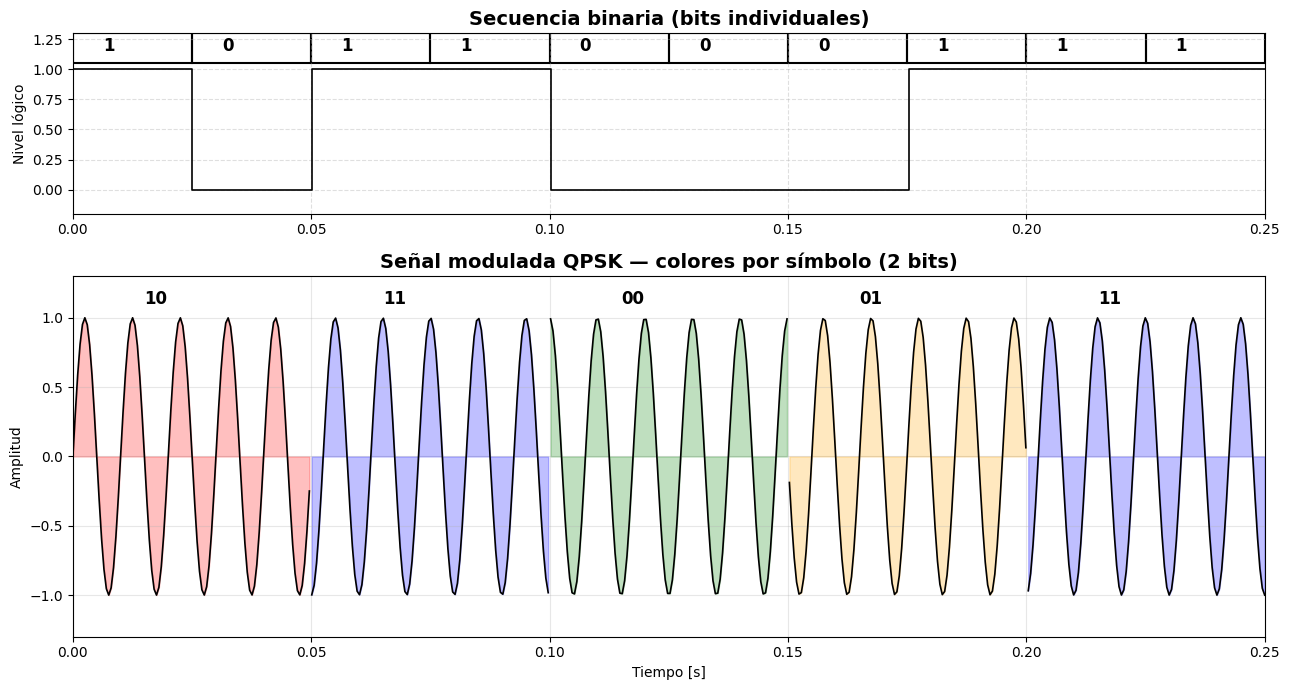

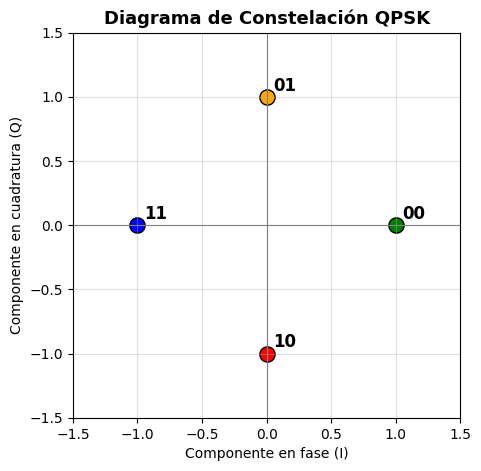

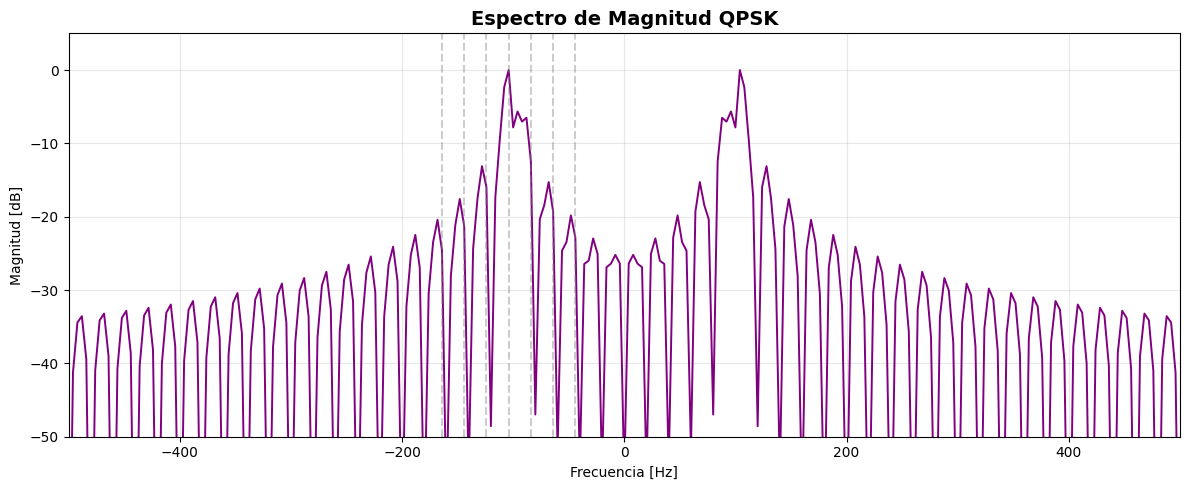

=== Mapeo QPSK ===
Bits (0, 0) → Fase   0.0°
Bits (0, 1) → Fase  90.0°
Bits (1, 1) → Fase 180.0°
Bits (1, 0) → Fase 270.0°

Secuencia transmitida: [1 0 1 1 0 0 0 1 1 1]
Símbolos (pares): [[1, 0], [1, 1], [0, 0], [0, 1], [1, 1]]

Lóbulo principal en -104.00 Hz
Espaciado Δf = 20.00 Hz


In [17]:
# ================================================================
# 🔹 VISUALIZACIÓN EDUCATIVA COMPLETA DE QPSK (BITS + SEÑAL + CONSTELACIÓN + ESPECTRO)
# ================================================================
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# ------------------------------------------------
# PARÁMETROS
# ------------------------------------------------
fs = 2000           # Frecuencia de muestreo [Hz]
fc = 100            # Frecuencia portadora [Hz]
Tb = 0.025          # Duración de bit [s]
Ts = 2 * Tb         # Duración por símbolo (2 bits)
bits = np.array([1,0, 1,1, 0,0, 0,1, 1,1])  # Secuencia de 10 bits (5 símbolos)
Ns_bit = int(fs * Tb)
Ns_sym = int(fs * Ts)

# ------------------------------------------------
# AGRUPACIÓN DE BITS EN PARES (Símbolos QPSK)
# ------------------------------------------------
symbols = bits.reshape(-1, 2)
mapping = {
    (0,0): 0,          # Fase 0°
    (0,1): np.pi/2,    # Fase 90°
    (1,1): np.pi,      # Fase 180°
    (1,0): 3*np.pi/2   # Fase 270°
}
color_map = {(1,0): 'red', (1,1): 'blue', (0,0): 'green', (0,1): 'orange'}

# ------------------------------------------------
# GENERACIÓN DE SEÑALES
# ------------------------------------------------
# Señal binaria (rectangular)
t_bits = np.linspace(0, Tb * len(bits), Ns_bit * len(bits))
bit_signal = np.repeat(bits, Ns_bit)

# Señal QPSK modulada
t_total = np.linspace(0, Ts * len(symbols), Ns_sym * len(symbols))
signal = np.zeros_like(t_total)
for i, sym in enumerate(symbols):
    phi = mapping[tuple(sym)]
    t = t_total[i*Ns_sym:(i+1)*Ns_sym]
    signal[i*Ns_sym:(i+1)*Ns_sym] = np.cos(2*np.pi*fc*t + phi)

# ================================================================
# 🔹 FIGURA 1: SECUENCIA BINARIA + SEÑAL QPSK
# ================================================================
fig, axs = plt.subplots(2, 1, figsize=(13, 7), gridspec_kw={'height_ratios': [1, 2]})
plt.subplots_adjust(hspace=0.35)

# ------------------------------------------------
# 🔸 Gráfica superior: SECUENCIA BINARIA RECTANGULAR
# ------------------------------------------------
axs[0].step(t_bits, bit_signal, where='post', color='k', linewidth=1.2)
axs[0].set_ylim([-0.2, 1.3])
axs[0].set_xlim([0, len(bits)*Tb])
axs[0].set_title("Secuencia binaria (bits individuales)", fontsize=14, fontweight='bold')
axs[0].set_ylabel("Nivel lógico")
axs[0].grid(True, ls='--', alpha=0.4)

# Dibujar cuadros y etiquetas sobre cada bit
for i, b in enumerate(bits):
    axs[0].add_patch(Rectangle((i*Tb, 1.05), Tb, 0.25, fill=False, edgecolor='k', linewidth=1.5))
    axs[0].text(i*Tb + Tb/2 - 0.005, 1.15, str(b), fontsize=12, fontweight='bold', ha='center')

# ------------------------------------------------
# 🔸 Gráfica inferior: SEÑAL QPSK MODULADA
# ------------------------------------------------
axs[1].set_title("Señal modulada QPSK — colores por símbolo (2 bits)", fontsize=14, fontweight='bold')
axs[1].set_xlabel("Tiempo [s]")
axs[1].set_ylabel("Amplitud")
axs[1].grid(True, alpha=0.3)

for i, sym in enumerate(symbols):
    t = t_total[i*Ns_sym:(i+1)*Ns_sym]
    axs[1].plot(t, signal[i*Ns_sym:(i+1)*Ns_sym], color='k', linewidth=1.2)
    axs[1].fill_between(t, signal[i*Ns_sym:(i+1)*Ns_sym], 0, color=color_map[tuple(sym)], alpha=0.25)
    axs[1].text(i*Ts + Ts/2 - 0.01, 1.1, f"{sym[0]}{sym[1]}", fontsize=12, fontweight='bold')

axs[1].set_ylim([-1.3, 1.3])
axs[1].set_xlim([0, len(symbols)*Ts])

plt.tight_layout()
plt.show()

# ================================================================
# 🔹 DIAGRAMA DE CONSTELACIÓN
# ================================================================
plt.figure(figsize=(5,5))
plt.title("Diagrama de Constelación QPSK", fontsize=13, fontweight='bold')
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)

const_points = {
    "00": (1, 0),
    "01": (0, 1),
    "11": (-1, 0),
    "10": (0, -1)
}
for label, (x, y) in const_points.items():
    plt.scatter(x, y, s=120, color=color_map[(int(label[0]), int(label[1]))], edgecolors='k')
    plt.text(x+0.05, y+0.05, label, fontsize=12, fontweight='bold')

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("Componente en fase (I)")
plt.ylabel("Componente en cuadratura (Q)")
plt.grid(True, alpha=0.4)
plt.show()

# ================================================================
# 🔹 ESPECTRO DE MAGNITUD
# ================================================================
N = len(signal)
S = np.fft.fftshift(np.fft.fft(signal))
f = np.fft.fftshift(np.fft.fftfreq(N, 1/fs))
S_mag = np.abs(S) / np.max(np.abs(S))
S_db = 20 * np.log10(S_mag + 1e-12)

plt.figure(figsize=(12,5))
plt.plot(f, S_db, color='purple', linewidth=1.4)
plt.title('Espectro de Magnitud QPSK', fontsize=14, fontweight='bold')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.grid(True, which='both', alpha=0.3)

df = 1 / Ts
main_idx = np.argmax(S_mag)
main_freq = f[main_idx]
lobes = [main_freq + k * df for k in range(-3, 4)]
for lf in lobes:
    plt.axvline(lf, color='gray', linestyle='--', alpha=0.4)

plt.xlim([-500, 500])
plt.ylim([-50, 5])
plt.tight_layout()
plt.show()

# ================================================================
# 🔹 INFORMACIÓN IMPRESA
# ================================================================
print("=== Mapeo QPSK ===")
for k, v in mapping.items():
    print(f"Bits {k} → Fase {np.degrees(v):>5.1f}°")
print(f"\nSecuencia transmitida: {bits}")
print(f"Símbolos (pares): {symbols.tolist()}")
print(f"\nLóbulo principal en {main_freq:.2f} Hz")
print(f"Espaciado Δf = {df:.2f} Hz")


#oscilogramas con la evolución del espectro

# 📡 Análisis Completo de la Simulación QPSK  
## (Tiempo — Fase — Frecuencia con Ventana Hann)

Este documento explica detalladamente el funcionamiento del código de simulación QPSK, con énfasis en:

1. Estructura de símbolos  
2. Generación de la señal  
3. Aplicación de la ventana Hann  
4. Obtención del espectro individual y total  
5. Interpretación física y matemática  

---

## 1. Parámetros básicos

- Frecuencia de muestreo:  
  $$
  f_s = 5000\ \text{Hz}
  $$
- Frecuencia de la portadora:  
  $$
  f_c = 500\ \text{Hz}
  $$
- Duración por bit:  
  $$
  T_b = 0.005\ \text{s}
  $$
- Duración por símbolo (QPSK usa 2 bits por símbolo):  
  $$
  T_s = 2T_b = 0.01\ \text{s}
  $$

La secuencia de bits usada es:

$$
\mathbf{b}=[1,0,1,1,0,0,0,1,1,1,0,1,1,0,0,0]
$$

lo cual genera:

$$
\text{Número de símbolos} = \frac{16}{2}=8
$$

---

## 2. Mapeo QPSK (Gray Code)

El código usa el mapeo:

$$
(0,0)\rightarrow 0^\circ,\qquad
(0,1)\rightarrow 90^\circ,\qquad
(1,1)\rightarrow 180^\circ,\qquad
(1,0)\rightarrow 270^\circ
$$

Esto corresponde a las fases:

$$
\varphi \in \{0,\ \frac{\pi}{2},\ \pi,\ \frac{3\pi}{2}\}
$$

El mapeo Gray minimiza errores de bit.

---

## 3. Generación de la señal QPSK

Para cada símbolo, la señal generada es:

$$
s_i(t)=\cos\left(2\pi f_c\, t + \varphi_i\right)
$$

La señal total es una concatenación por tramos:

$$
s(t)=\sum_{i=0}^{7} s_i(t - iT_s)
$$

Cada tramo tiene:

$$
N_s = f_s T_s = 50\ \text{muestras por símbolo}
$$

---

## 4. Ventana Hann para el cálculo del espectro

Antes de aplicar la FFT se multiplica la región activa de la señal por una ventana Hann:

$$
w[n] = \frac{1}{2}\left(1 - \cos\left(\frac{2\pi n}{N-1}\right)\right)
$$

Esto reduce el leakage espectral.

El proceso es:

$$
s_w[n] = s[n]\, w[n]
$$

---

## 5. Cálculo del espectro en dB

La FFT utilizada es:

$$
S(f) = \operatorname{FFT}\{s_w(t)\}
$$

Luego se normaliza:

$$
|S(f)|_{\text{norm}}=\frac{|S(f)|}{\max |S(f)|}
$$

Finalmente se convierte a dB:

$$
S_{\text{dB}}(f)=20\log_{10}\Big(|S(f)|_{\text{norm}} + 10^{-12}\Big)
$$

Se usa shift para centrar la frecuencia:

$$
f = \operatorname{fftshift}(\operatorname{fftfreq}(N,1/f_s))
$$

---

## 6. Espectro teórico sinc del pulso rectangular

Cada símbolo QPSK es un pulso rectangular modulado en fase:

$$
s_i(t)=\cos(2\pi f_c t+\varphi_i)\cdot \operatorname{rect}(t/T_s)
$$

Por lo tanto, su magnitud espectral es:

$$
|S_i(f)| \propto \left|\operatorname{sinc}\left((f-f_c)T_s\right)\right|
$$

La forma del espectro **no depende de la fase**, por eso los cuatro espectros individuales se superponen.

El primer nulo ocurre en:

$$
f = f_c \pm \frac{1}{T_s}
$$

Como:

$$
T_s = 0.01\ \text{s}
$$

entonces:

$$
\Delta f = \frac{1}{T_s} = 100\ \text{Hz}
$$

---

## 7. Espectro global de la señal completa

La señal completa es una concatenación de pulsos, por lo que su espectro es:

$$
S_{\text{total}}(f)= S(f)\cdot P(f)
$$

donde:

- $S(f)$ = espectro del pulso sinc  
- $P(f)$ = espectro del tren de símbolos  

Debido a la periodicidad discreta en fase, el espectro total aparece **más denso** y con ligeros reforzamientos dependiendo del patrón de fases.

El valor teórico del primer lóbulo es:

$$
A_1 = -13.26\ \text{dB}
$$

lo cual se marca en la gráfica.

---

## 8. Gráficas del código

### 🟦 1. Señal QPSK en el tiempo
Se colorea cada símbolo y se etiqueta con sus bits.  
Visualmente se aprecia:

- Mismos niveles de amplitud (QPSK no varía amplitud)
- Cambios de fase abruptos entre símbolos
- Duración constante de cada tramo

---

### 🟪 2. Espectro total QPSK
Se muestra:

- Lóbulo principal centrado en $f_c$
- Atenuación esperada
- Lóbulos secundarios sinc

El eje X se extiende para ver varios lóbulos:

$$
[f_c - 2000,\ f_c + 2000]
$$

---

### 🟧 3. Espectro individual por símbolo
Los cuatro espectros se superponen porque:

$$
|S_{00}(f)| = |S_{01}(f)| = |S_{11}(f)| = |S_{10}(f)|
$$

(es decir, la fase **no** afecta la **magnitud** del espectro).

---

# ✅ Conclusión

El código implementa correctamente:

- Modulación QPSK rectangular  
- Análisis tiempo–frecuencia  
- Espectro total vs pulso individual  
- Aplicación adecuada de Hann  
- Verificación del lóbulo principal y de los nulos $\pm 1/T_s$  

Este análisis reproduce exactamente la teoría de QPSK con pulsos rectangulares, mostrando tanto la estructura temporal como la respuesta espectral sinc obligatoria.

---


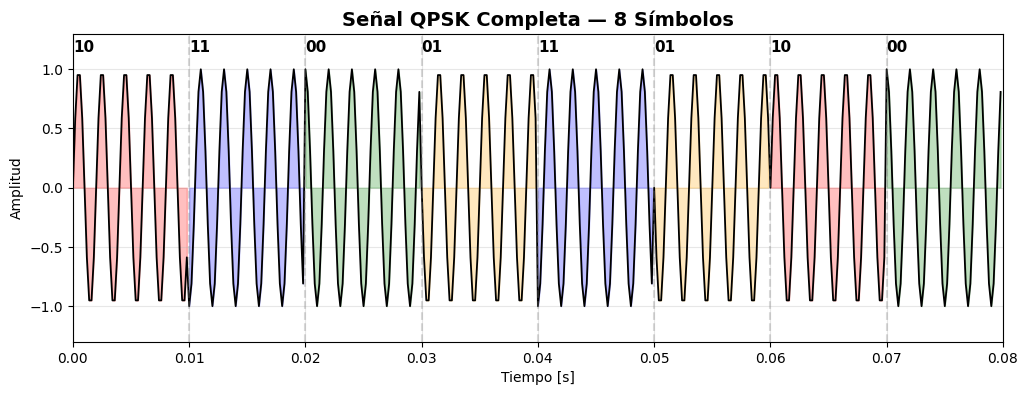

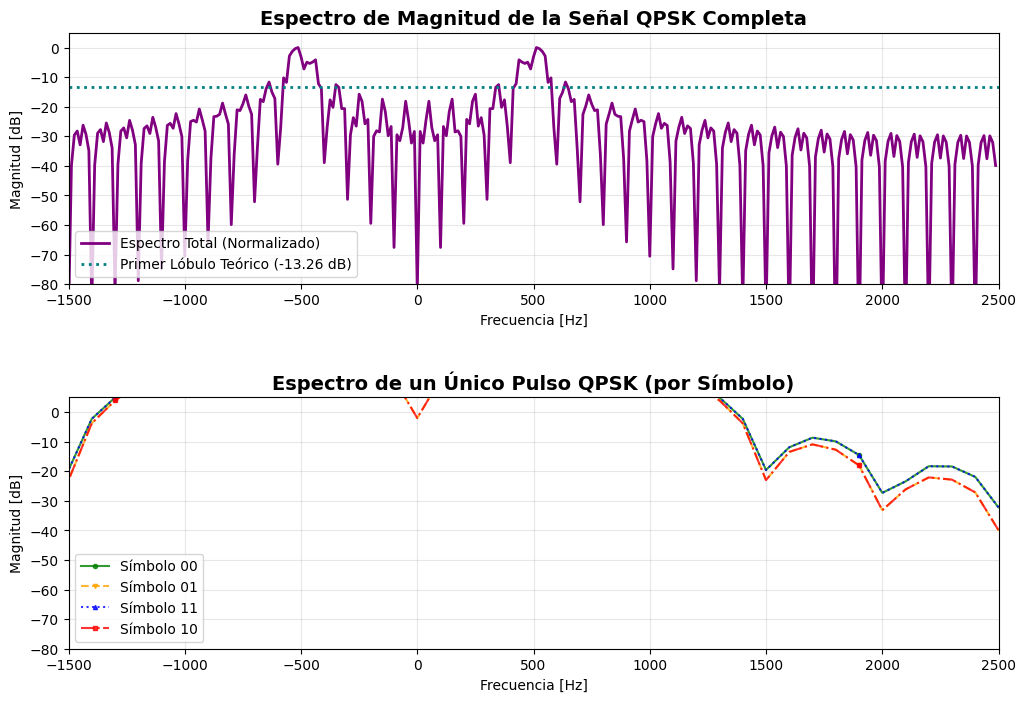

In [18]:
# ================================================================
# 🔷 SIMULACIÓN QPSK RECTANGULAR: ANÁLISIS TIEMPO-FRECUENCIA ESTATICO (CORRECCIÓN DE EJES)
# ================================================================
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------
# ⚙️ PARÁMETROS DE LA SIMULACIÓN
# ------------------------------------------------
fs = 5000       # Frecuencia de muestreo [Hz]
fc = 500        # Frecuencia portadora [Hz]
Tb = 0.005      # Duración por bit [s]
Ts = 2 * Tb     # Duración por símbolo (10 ms)
# 16 bits → 8 símbolos
bits = np.array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0])

Ns_sym = int(fs * Ts)  # Muestras por símbolo

# ------------------------------------------------
# MAPEO Y ESTRUCTURA
# ------------------------------------------------
MAPPING_PHASE = {
    (0,0): 0,           # 0°
    (0,1): np.pi/2,     # 90°
    (1,1): np.pi,       # 180°
    (1,0): 3*np.pi/2    # 270°
}
COLOR_MAP = {(1,0): 'red', (1,1): 'blue', (0,0): 'green', (0,1): 'orange'}

symbols = bits.reshape(-1, 2)
num_symbols = len(symbols)
t_total = np.linspace(0, Ts * num_symbols, Ns_sym * num_symbols, endpoint=False)


# ------------------------------------------------
# 🛠️ FUNCIONES MODULARIZADAS
# ------------------------------------------------

def generate_qpsk_signal(t_array, symbols_to_process):
    """Genera la señal QPSK para un conjunto de símbolos dado."""
    signal_len = len(t_array)
    signal = np.zeros(signal_len)

    for i, sym in enumerate(symbols_to_process):
        phi = MAPPING_PHASE[tuple(sym)]
        idx_start = i * Ns_sym
        idx_end = (i + 1) * Ns_sym
        t = t_array[idx_start:idx_end]

        if idx_start < signal_len:
            signal[idx_start:idx_end] = np.cos(2*np.pi*fc*t + phi)

    return signal

def apply_hann_window(data):
    """Aplica la ventana Hann a los datos (solo a la porción no nula)."""
    N = len(data)
    non_zero_indices = np.where(data != 0)[0]
    if len(non_zero_indices) == 0:
        return np.zeros_like(data)

    start, end = non_zero_indices[0], non_zero_indices[-1] + 1
    N_active = end - start

    window = np.hanning(N_active)
    windowed_data = np.zeros_like(data)
    windowed_data[start:end] = data[start:end] * window
    return windowed_data

def calculate_spectrum(signal_data, fs, normalize=True):
    """Calcula la FFT, aplica fftshift y convierte a dB."""
    N = len(signal_data)
    windowed_signal = apply_hann_window(signal_data)

    S = np.fft.fftshift(np.fft.fft(windowed_signal))
    f = np.fft.fftshift(np.fft.fftfreq(N, 1/fs))

    # Normalización y dB
    if normalize and np.max(np.abs(S)) > 1e-12:
        S_mag = np.abs(S) / np.max(np.abs(S))
    else:
        S_mag = np.abs(S)

    S_db = 20 * np.log10(S_mag + 1e-12)
    return f, S_db

# ------------------------------------------------
# GENERACIÓN DE SEÑALES Y ESPECTROS INDIVIDUALES
# ------------------------------------------------

signal_full = generate_qpsk_signal(t_total, symbols)
f_full, S_db_full = calculate_spectrum(signal_full, fs)
A1_db_teorico = -13.26

symbols_test = list(MAPPING_PHASE.keys())
fs_test = fs * 5 # Usar una fs alta para mejor resolución espectral
Ts_test = Ts
t_test = np.linspace(0, Ts_test, int(fs_test * Ts_test), endpoint=False)

f_single_pulse = {}
S_db_single_pulse = {}

for sym in symbols_test:
    single_sym_signal = generate_qpsk_signal(t_test, np.array([sym]))
    f, S_db = calculate_spectrum(single_sym_signal, fs_test, normalize=False)
    S_db_single_pulse[sym] = S_db
    f_single_pulse[sym] = f


# ------------------------------------------------
# 🔹 GRÁFICA 1: Señal QPSK Completa en el Tiempo
# ------------------------------------------------
fig1, ax1 = plt.subplots(1, 1, figsize=(12, 4))

ax1.plot(t_total, signal_full, color='k', lw=1.3)
ax1.set_title("Señal QPSK Completa — {} Símbolos".format(num_symbols),
             fontsize=14, fontweight='bold')
ax1.set_xlabel("Tiempo [s]")
ax1.set_ylabel("Amplitud")
ax1.set_xlim(0, num_symbols*Ts)
ax1.set_ylim(-1.3, 1.3)
ax1.grid(True, alpha=0.3)

# Colorear y etiquetar símbolos
for i, sym in enumerate(symbols):
    t_sym = t_total[i*Ns_sym:(i+1)*Ns_sym]
    ax1.fill_between(t_sym, signal_full[i*Ns_sym:(i+1)*Ns_sym], 0,
                     color=COLOR_MAP[tuple(sym)], alpha=0.25)
    ax1.text(i*Ts + Ts/2 - 0.005, 1.15, f"{sym[0]}{sym[1]}", fontsize=11, fontweight='bold')
    ax1.axvline(i*Ts, color='gray', linestyle='--', alpha=0.3)

plt.show()

# ------------------------------------------------
# 🔹 GRÁFICA 2: Espectro Total vs. Espectro de Símbolos Individuales (Corregida)
# ------------------------------------------------
fig2, (ax2, ax3) = plt.subplots(2, 1, figsize=(12, 8))
plt.subplots_adjust(hspace=0.45)

# --- Subplot 2: Espectro de la Señal QPSK Total (Normalizado) ---
ax2.plot(f_full, S_db_full, color='purple', lw=2.0, label='Espectro Total (Normalizado)')
ax2.set_title("Espectro de Magnitud de la Señal QPSK Completa", fontsize=14, fontweight='bold')
ax2.set_xlabel("Frecuencia [Hz]")
ax2.set_ylabel("Magnitud [dB]")
# Rango extendido para asegurar visibilidad
ax2.set_xlim(fc - 2000, fc + 2000)
ax2.set_ylim(-80, 5)
ax2.grid(True, which='both', alpha=0.3)
ax2.axhline(A1_db_teorico, color='teal', linestyle=':', lw=2, label=f'Primer Lóbulo Teórico ({A1_db_teorico:.2f} dB)')
ax2.legend(loc='lower left', fontsize=10)


# --- Subplot 3: Espectro de Símbolos Individuales (Con rangos extendidos) ---
ax3.set_title("Espectro de un Único Pulso QPSK (por Símbolo)", fontsize=14, fontweight='bold')
ax3.set_xlabel("Frecuencia [Hz]")
ax3.set_ylabel("Magnitud [dB]")
# Rango extendido para asegurar visibilidad del lóbulo principal
ax3.set_xlim(fc - 2000, fc + 2000)
ax3.set_ylim(-80, 5) # Eje Y fijo
ax3.grid(True, which='both', alpha=0.3)

line_styles = ['-', '--', ':', '-.']
markers = ['o', 'v', '^', 's']
i = 0
for sym, S_db in S_db_single_pulse.items():
    label = f'Símbolo {sym[0]}{sym[1]}'
    # La superposición de líneas es esperada (la fase solo desplaza la señal en el tiempo,
    # no cambia la forma de su magnitud espectral, Sinc).
    ax3.plot(f_single_pulse[sym], S_db,
             color=COLOR_MAP[sym],
             ls=line_styles[i],
             marker=markers[i],
             markersize=3, # Marcadores más pequeños
             markevery=int(len(f_single_pulse[sym]) / 15), # Muestra marcadores cada cierto intervalo
             lw=1.5,
             alpha=0.8,
             label=label)
    i += 1

ax3.legend(loc='lower left', fontsize=10)

plt.show()

## OQPSK

# 📡 Explicación Matemática — OQPSK con Pulso Rectangular

Este documento explica detalladamente la teoría y el procedimiento matemático detrás del código que genera una señal **OQPSK (Offset Quadrature Phase-Shift Keying)** usando pulsos rectangulares (NRZ), portadoras ortogonales y análisis espectral mediante FFT.

---

## 1. 🧩 Mapeo de Bits a Niveles I/Q

Los bits binarios $b \in \{0,1\}$ se convierten a niveles polares en $\{-1,+1\}$ mediante:

$$
a = 2b - 1
$$

De manera que:

- $b=0 \Rightarrow a=-1$  
- $b=1 \Rightarrow a=+1$

Luego se separan en dos flujos:

- Bits en posiciones pares → **rama I**
- Bits en posiciones impares → **rama Q**

Produciendo secuencias:

$$
I[n], \qquad Q[n] \in \{-1,+1\}
$$

---

## 2. ⏱️ Pulso NRZ Rectangular

Cada bit se expande a un pulso rectangular (“escalón”) de duración $T_b$.

El número de muestras por bit es:

$$
N_b = f_s T_b
$$

La representación discreta queda como:

$$
I[n] = I_{\left\lfloor \frac{n}{N_b} \right\rfloor},
\qquad
Q[n] = Q_{\left\lfloor \frac{n}{N_b} \right\rfloor}
$$

---

## 3. ⏳ Retardo Característico de OQPSK

La clave de OQPSK es que **la rama Q se retrasa un bit**, equivalente a $T_b$ segundos o $N_b$ muestras:

$$
Q_{\text{OQPSK}}[n] = Q[n - N_b]
$$

Efectos:

- Nunca cambian simultáneamente $I$ y $Q$.
- Se evita cambio de fase de $\pi$ (180°), típico de QPSK convencional.
- La envolvente no cae a cero:
  
  $$
  A(t) = \sqrt{I^2(t) + Q^2(t)}
  $$

---

## 4. 📡 Portadoras Ortogonales

Las portadoras utilizadas son:

$$
\cos(2\pi f_c t),
\qquad
\sin(2\pi f_c t)
$$

Ambas separadas 90° para garantizar ortogonalidad.

---

## 5. 🛰️ Señal OQPSK en Banda Pasante

La modulación en tiempo discreto tomada del código es:

$$
s[n] = I[n]\cos\left(2\pi f_c \frac{n}{f_s}\right)
      - Q_{\text{OQPSK}}[n]\sin\left(2\pi f_c \frac{n}{f_s}\right)
$$

Donde:

- I modula la portadora **en fase**.
- Q modula la portadora **en cuadratura** con el *offset*.

---

## 6. 📊 Análisis Espectral (FFT)

Antes de transformar, se multiplica por una ventana Hann para reducir *spectral leakage*:

$$
w[n] = 0.5\left( 1 - \cos\frac{2\pi n}{N-1} \right)
$$

La FFT se calcula como:

$$
X[k] = \sum_{n=0}^{N-1} s[n]\; w[n] \, e^{-j2\pi kn/N}
$$

Luego el espectro se normaliza y se expresa en dB:

$$
X_{\mathrm{dB}}[k] =
20\log_{10}\left(\frac{|X[k]|}{\max|X[k]|} + 10^{-12}\right)
$$

---

## 7. ✨ Propiedades y Comportamiento Espectral

- Debido al pulso NRZ rectangular, el espectro presenta forma:

  $$
  \operatorname{sinc}
  $$

- El primer lóbulo lateral típico es aproximadamente:

  $$
  -13.26\;\text{dB}
  $$

- Aunque OQPSK mantiene **envolvente casi constante**, **NO cambia** la estructura espectral cuando se usan pulsos rectangulares.
- Su ventaja principal es evitar distorsión por amplificadores no lineales.

---

## 8. 📌 Elementos que se Observan en las Figuras Generadas

1. **Bits transmitidos**  
   Secuencia en 0–1.

2. **Formas NRZ de I(t) y Q(t)**  
   Con $Q(t)$ retrasada exactamente $T_b$.

3. **Modulación OQPSK en banda pasante**  
   Combinación $I\cos$ y $Q\sin$ con offset.

4. **Constelación QPSK/OQPSK**  
   Siempre en cuadrantes sin saltos de fase de 180°.

5. **Espectro normalizado en dB**  
   Con ventana Hann y FFT.

---

## 9. 🧠 Resumen General

- OQPSK = QPSK con **retraso de un bit en Q**.
- Evita cambios simultáneos en I y Q.
- Previene saltos bruscos de fase y caídas a cero de amplitud.
- Es más adecuado para transmisiones RF reales.
- El espectro depende del pulso usado (rectangular → forma sinc).

---


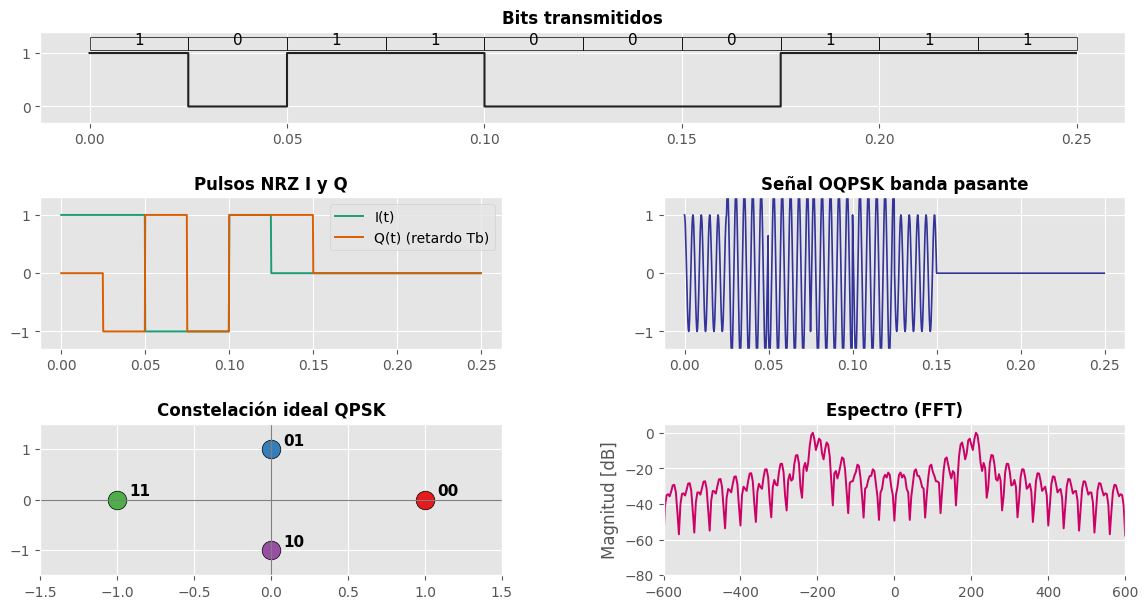

In [19]:
# ================================================================
# OQPSK - Evolución temporal y espectral (versión sin animación, visual renovada)
# ================================================================
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# -----------------------------
# Parámetros configurables
# -----------------------------
fs = 4000
fc = 200
Tb = 0.025
Ts = 2 * Tb
bits = np.array([1,0, 1,1, 0,0, 0,1, 1,1], dtype=int)

assert len(bits) % 2 == 0

# -----------------------------
# parámetros derivados
# -----------------------------
N_bits = len(bits)
N_symbols = N_bits // 2
Ns_bit = int(fs * Tb)
Ns_sym = int(fs * Ts)
t_bits = np.linspace(0, Tb * N_bits, Ns_bit * N_bits, endpoint=False)
t_total = np.linspace(0, Ts * N_symbols, Ns_sym * N_symbols, endpoint=False)

def bit_to_level(b):
    return 2*b - 1

I_bits = bits[0::2]
Q_bits = bits[1::2]
I_levels = bit_to_level(I_bits)
Q_levels = bit_to_level(Q_bits)

N_total = len(t_total)
I_samples = np.zeros(N_total)
Q_samples = np.zeros(N_total)

for i, lvl in enumerate(I_levels):
    s0 = i * Ns_bit
    s1 = s0 + Ns_bit
    if s1 <= N_total:
        I_samples[s0:s1] = lvl

for i, lvl in enumerate(Q_levels):
    s0 = i * Ns_bit + Ns_bit
    s1 = s0 + Ns_bit
    if s0 < N_total:
        Q_samples[s0:min(s1, N_total)] = lvl

carrier_cos = np.cos(2*np.pi*fc*t_total)
carrier_sin = np.sin(2*np.pi*fc*t_total)
s_oqpsk = I_samples * carrier_cos - Q_samples * carrier_sin

# -----------------------------
# FFT con ventana Hann
# -----------------------------
def compute_fft(signal, fs):
    N = len(signal)
    w = np.hanning(N)
    S = np.fft.fftshift(np.fft.fft(signal*w))
    f = np.fft.fftshift(np.fft.fftfreq(N, 1/fs))
    Sdb = 20*np.log10(np.abs(S)/np.max(np.abs(S))+1e-12)
    return f, Sdb

f_tot, S_tot = compute_fft(s_oqpsk, fs)

# -----------------------------
# FIGURA PRINCIPAL
# -----------------------------
plt.style.use('ggplot')
fig = plt.figure(figsize=(14,10))
gs = fig.add_gridspec(4, 2, height_ratios=[0.6,1,1,1], hspace=0.55, wspace=0.35)

# 1) Bits
ax_bits = fig.add_subplot(gs[0, :])
ax_bits.step(t_bits, np.repeat(bits, Ns_bit), where='post', color='#222222', lw=1.5)
ax_bits.set_ylim(-0.3, 1.4)
ax_bits.set_title("Bits transmitidos", fontsize=12, fontweight='bold')

for i,b in enumerate(bits):
    x0 = i*Tb
    ax_bits.add_patch(Rectangle((x0,1.05), Tb,0.25, fill=False, edgecolor='black'))
    ax_bits.text(x0+Tb/2,1.17,str(b),ha='center',fontsize=11)

# 2) Pulsos NRZ I/Q
ax_iq = fig.add_subplot(gs[1, 0])
ax_iq.plot(t_total, I_samples, label="I(t)", color="#1b9e77", lw=1.4)
ax_iq.plot(t_total, Q_samples, label="Q(t) (retardo Tb)", color="#d95f02", lw=1.4)
ax_iq.set_title("Pulsos NRZ I y Q", fontsize=12, fontweight="bold")
ax_iq.set_ylim(-1.3,1.3)
ax_iq.legend()

# 3) Señal OQPSK
ax_sig = fig.add_subplot(gs[1, 1])
ax_sig.plot(t_total, s_oqpsk, color="#333399", lw=1.2)
ax_sig.set_title("Señal OQPSK banda pasante", fontsize=12, fontweight="bold")
ax_sig.set_ylim(-1.3,1.3)

# 4) Constelación renovada
ax_const = fig.add_subplot(gs[2, 0])
ax_const.set_title("Constelación ideal QPSK", fontsize=12, fontweight='bold')
ax_const.axhline(0, color='gray', lw=0.8)
ax_const.axvline(0, color='gray', lw=0.8)

points = {'00':(1,0), '01':(0,1), '11':(-1,0), '10':(0,-1)}
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']

for k,(lab,xy) in enumerate(points.items()):
    ax_const.scatter(xy[0],xy[1],s=180,color=colors[k],edgecolors='black',marker='o')
    ax_const.text(xy[0]+0.08, xy[1]+0.08, lab, fontsize=11, fontweight='bold')

ax_const.set_xlim(-1.5,1.5)
ax_const.set_ylim(-1.5,1.5)

# 5) FFT rediseñada
ax_spec = fig.add_subplot(gs[2,1])
ax_spec.plot(f_tot, S_tot, lw=1.4, color="#cc0066")
ax_spec.set_title("Espectro (FFT)", fontsize=12, fontweight='bold')
ax_spec.set_xlim(-600,600)
ax_spec.set_ylim(-80,5)
ax_spec.set_ylabel("Magnitud [dB]")

plt.show()


#MSK

## 🎯 Modulación MSK (Minimum Shift Keying)

La modulación **MSK (Minimum Shift Keying)** puede interpretarse como un caso particular de **CPFSK (Continuous Phase Frequency Shift Keying)**, donde el índice de modulación cumple $h = 0.5$.  
Esta propiedad garantiza **continuidad de fase** y **ortogonalidad de frecuencias**, reduciendo así la dispersión espectral.

---

### 1. Parámetros Fundamentales y Discretización ⚙️

El sistema se discretiza empleando un paso temporal $T_s = 1/f_s$.

**Definiciones básicas:**
- Tiempo discreto total:  
  $$ t[n] = nT_s, \quad n = 0, 1, \dots, N_{\text{total}} - 1 $$
- Muestras por bit:  
  $$ N_s^{(b)} = \text{round}(f_s T_b) $$

Estas constantes establecen la resolución temporal del sistema digital.

---

### 2. Mapeo Binario a Niveles NRZ Bipolar 🔁

Cada bit $b_k \in \{0,1\}$ se convierte a un símbolo bipolar $a_k \in \{-1, +1\}$ mediante:

$$
a_k = 2b_k - 1
$$

La secuencia discreta $a[n]$ se obtiene repitiendo el valor de $a_k$ durante $N_s^{(b)}$ muestras consecutivas, generando una forma rectangular (NRZ).

---

### 3. MSK como CPFSK con Índice $h = 0.5$ 📡

MSK se define como una modulación FSK de **fase continua** donde el índice $h$ determina la separación mínima de frecuencias $\Delta f$ que mantiene ortogonalidad entre símbolos:

$$
h = 2\Delta f T_b
$$

Dado $h = 0.5$, el desplazamiento de frecuencia mínimo es:

$$
\Delta f = \frac{1}{4T_b}
$$

Por tanto, la **frecuencia instantánea** varía en función del símbolo transmitido:

$$
f_{\text{inst}}[n] = f_c + \Delta f \cdot a[n]
$$

donde $a[n] \in \{-1, +1\}$ modula la frecuencia alrededor de la portadora $f_c$.

---

### 4. Fase Continua y Señal en Banda Pasante 🌀

La señal MSK puede expresarse como:

$$
s(t) = A \cos(2\pi f_c t + \phi(t))
$$

La **fase acumulada** $\phi(t)$ se obtiene como la integral de la desviación de frecuencia respecto a la portadora:

$$
\phi(t) = 2\pi \int_0^t (f(\tau) - f_c)\, d\tau = 2\pi \Delta f \int_0^t a(\tau)\, d\tau
$$

En tiempo discreto, la fase acumulada se implementa mediante una suma acumulativa:

$$
\phi[n] = \frac{2\pi}{f_s} \sum_{m=0}^{n} f_{\text{inst}}[m]
$$

Separando componentes:

$$
\phi[n] = 2\pi f_c \frac{n}{f_s} + \frac{2\pi \Delta f}{f_s} \sum_{m=0}^{n} a[m]
$$

La **señal modulada final** se expresa como:

$$
s[n] = \cos(\phi[n])
$$

La continuidad de $\phi[n]$ asegura que la fase no presenta saltos, concentrando la energía espectral alrededor de $f_c$ y reduciendo la presencia de lóbulos laterales.

---

### 5. Transformada de Fourier y Análisis Espectral 🔍

Para estudiar el contenido espectral de $s[n]$, se aplica la DFT con una **ventana de Hann** para reducir el *leakage* espectral:

$$
w[n] = 0.5 \left(1 - \cos\!\left(\frac{2\pi n}{N-1}\right)\right)
$$

La **Transformada Discreta de Fourier (DFT)** se calcula como:

$$
S[k] = \sum_{n=0}^{N-1} (s[n] \cdot w[n]) e^{-j 2\pi kn/N}
$$

El **vector de frecuencias** centrado se define como:

$$
f[k] = \left(\frac{k - N/2}{N}\right) f_s
$$

**Normalización en dB:**

$$
S_{\text{dB}}[k] = 20\log_{10}\!\left(\frac{|S[k]|}{\max_k |S[k]| + \varepsilon} + \varepsilon\right),
\qquad \varepsilon \approx 10^{-12}
$$

La **resolución espectral** depende del tamaño de la FFT:

$$
\Delta f = \frac{f_s}{N}
$$

---

### 6. Interpretación de Resultados 📊

- **Frecuencia Instantánea:** alterna entre $f_c + \Delta f$ (cuando $b=1$) y $f_c - \Delta f$ (cuando $b=0$).  
- **Fase Continua:** al final de cada intervalo $T_b$, la fase cambia exactamente $\pm \pi/2$, ya que $2\pi \Delta f T_b = \pi/2$.  
- **Espectro:** la continuidad de fase suaviza las transiciones y provoca una rápida atenuación de los lóbulos laterales, mejorando la **eficiencia espectral** frente a FSK o QPSK con pulsos rectangulares.

---

### 7. 🧩 Resumen de Fórmulas Importantes

| Concepto | Expresión |
|-----------|------------|
| Desplazamiento de frecuencia | $\Delta f = \tfrac{1}{4T_b}$ |
| Frecuencia instantánea | $f_{\text{inst}}[n] = f_c + \Delta f \cdot a[n]$ |
| Fase acumulada | $\phi[n] = \tfrac{2\pi}{f_s} \sum_{m=0}^{n} f_{\text{inst}}[m]$ |
| Señal modulada | $s[n] = \cos(\phi[n])$ |

---

💡 **Conclusión:**  
MSK logra la **mínima separación de frecuencia posible** con **fase continua**, lo que permite una **transmisión espectralmente eficiente**, menor interferencia entre canales y un excelente desempeño en sistemas inalámbricos con amplificadores no lineales.


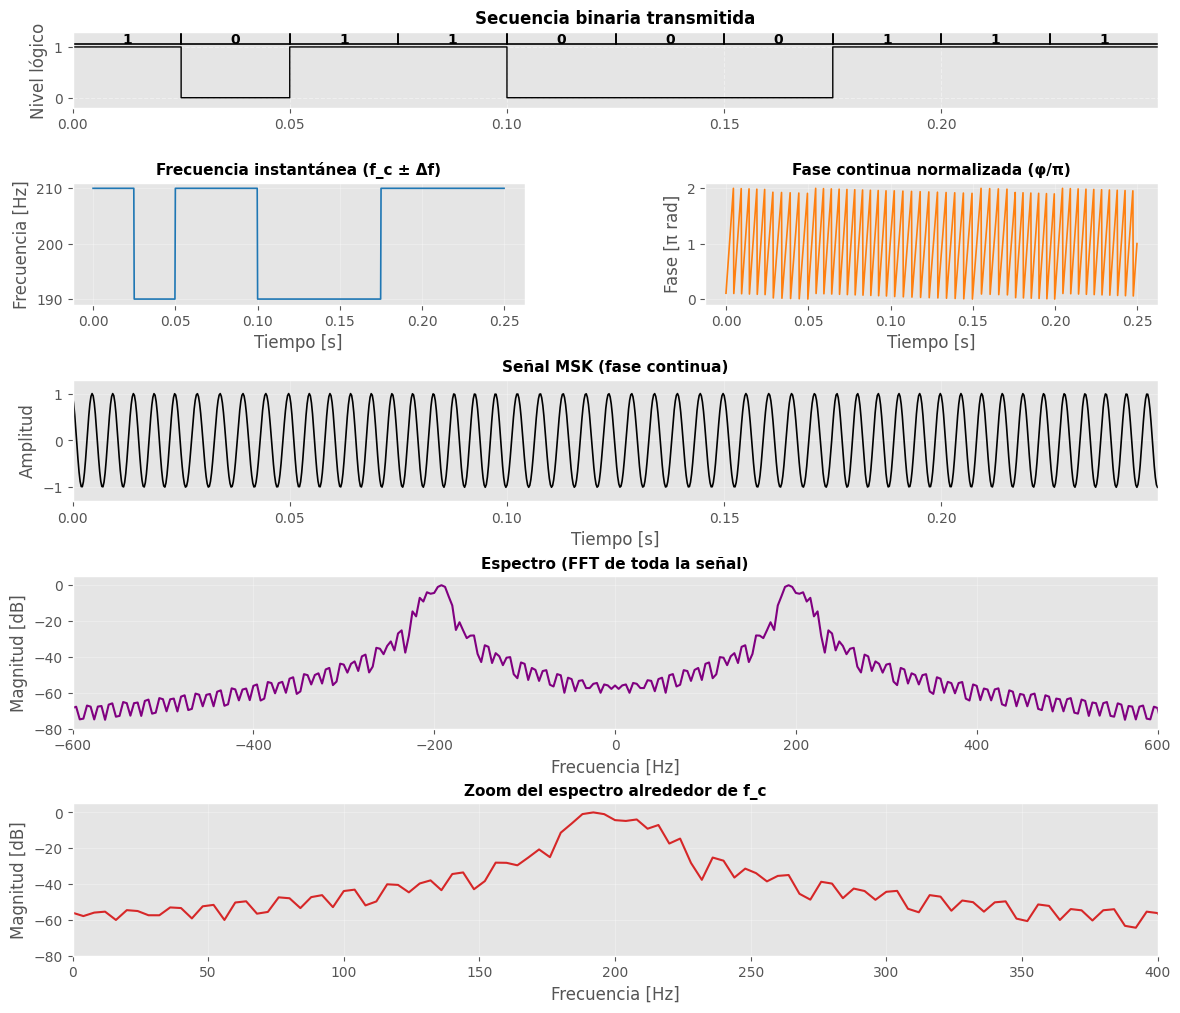

In [20]:
# ================================================================
# MSK - Análisis temporal y espectral (sin animación)
# ================================================================
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# -----------------------------
# Parámetros
# -----------------------------
fs = 4000            # frecuencia de muestreo [Hz]
fc = 200             # frecuencia portadora [Hz]
Tb = 0.025           # duración de bit [s]
bits = np.array([1,0,1,1,0,0,0,1,1,1], dtype=int)

# -----------------------------
# Variables derivadas
# -----------------------------
N_bits = len(bits)
Ns_bit = int(np.round(fs * Tb))
t_total = np.linspace(0, N_bits*Tb, N_bits*Ns_bit, endpoint=False)

# niveles NRZ bipolar: 0 -> -1, 1 -> +1
def bit_to_level(b): return 2*b - 1
levels = bit_to_level(bits)

# señal baseband NRZ (rectangular)
data_nrz = np.repeat(levels, Ns_bit)

# -----------------------------
# Construcción de la señal MSK (CPFSK con h = 0.5)
# -----------------------------
Df = 1 / (4*Tb)  # desviación de frecuencia
f_inst = fc + Df * data_nrz
phi = 2*np.pi*np.cumsum(f_inst) / fs  # fase acumulada
s_msk = np.cos(phi)

# -----------------------------
# FFT con ventana Hann
# -----------------------------
def compute_fft(signal, fs):
    N = len(signal)
    window = np.hanning(N)
    S = np.fft.fftshift(np.fft.fft(signal * window, n=N))
    f = np.fft.fftshift(np.fft.fftfreq(N, d=1.0/fs))
    S_mag = np.abs(S)
    S_db = 20 * np.log10(S_mag / (S_mag.max() + 1e-12))
    return f, S_db

f_tot, S_tot_db = compute_fft(s_msk, fs)

# -----------------------------
# Cálculo de la fase instantánea (envolvente)
# -----------------------------
phi_unwrapped = np.unwrap(phi)
phase_norm = (phi_unwrapped % (2*np.pi)) / np.pi  # fase normalizada (en múltiplos de π)

# -----------------------------
# GRÁFICOS ESTÁTICOS
# -----------------------------
fig = plt.figure(figsize=(14,12))
gs = fig.add_gridspec(5, 2, height_ratios=[0.5, 0.8, 0.8, 1.0, 1.0], hspace=0.6, wspace=0.4)

# 1) Secuencia de bits
ax1 = fig.add_subplot(gs[0, :])
ax1.step(t_total, np.repeat(bits, Ns_bit), where='post', color='k', lw=1)
ax1.set_ylim(-0.2, 1.3)
ax1.set_xlim(0, t_total[-1])
ax1.set_title("Secuencia binaria transmitida", fontsize=12, fontweight='bold')
ax1.set_ylabel("Nivel lógico")
ax1.grid(True, ls='--', alpha=0.4)
for i, b in enumerate(bits):
    x0 = i * Tb
    ax1.add_patch(Rectangle((x0, 1.05), Tb, 0.25, fill=False, edgecolor='k', linewidth=1.2))
    ax1.text(x0 + Tb/2, 1.15, str(b), ha='center', va='center', fontsize=10, fontweight='bold')

# 2) Frecuencia instantánea
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(t_total, f_inst, color='tab:blue', lw=1.2)
ax2.set_title("Frecuencia instantánea (f_c ± Δf)", fontsize=11, fontweight='bold')
ax2.set_xlabel("Tiempo [s]")
ax2.set_ylabel("Frecuencia [Hz]")
ax2.grid(True, alpha=0.3)

# 3) Fase acumulada
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(t_total, phase_norm, color='tab:orange', lw=1.2)
ax3.set_title("Fase continua normalizada (φ/π)", fontsize=11, fontweight='bold')
ax3.set_xlabel("Tiempo [s]")
ax3.set_ylabel("Fase [π rad]")
ax3.grid(True, alpha=0.3)

# 4) Señal MSK (oscilograma)
ax4 = fig.add_subplot(gs[2, :])
ax4.plot(t_total, s_msk, color='k', lw=1.2)
ax4.set_xlim(0, t_total[-1])
ax4.set_ylim(-1.3, 1.3)
ax4.set_title("Señal MSK (fase continua)", fontsize=11, fontweight='bold')
ax4.set_xlabel("Tiempo [s]")
ax4.set_ylabel("Amplitud")
ax4.grid(True, alpha=0.3)

# 5) Espectro completo
ax5 = fig.add_subplot(gs[3, :])
ax5.plot(f_tot, S_tot_db, color='purple', lw=1.5)
ax5.set_title("Espectro (FFT de toda la señal)", fontsize=11, fontweight='bold')
ax5.set_xlim(-600, 600)
ax5.set_ylim(-80, 5)
ax5.set_xlabel("Frecuencia [Hz]")
ax5.set_ylabel("Magnitud [dB]")
ax5.grid(True, which='both', alpha=0.3)

# 6) Zoom del espectro central
ax6 = fig.add_subplot(gs[4, :])
ax6.plot(f_tot, S_tot_db, color='tab:red', lw=1.5)
ax6.set_xlim(fc - 200, fc + 200)
ax6.set_ylim(-80, 5)
ax6.set_title("Zoom del espectro alrededor de f_c", fontsize=11, fontweight='bold')
ax6.set_xlabel("Frecuencia [Hz]")
ax6.set_ylabel("Magnitud [dB]")
ax6.grid(True, alpha=0.3)

plt.show()


## Explicación Matemática y Procedimiento del SFSK (Shaped FSK / GFSK)

---

### 1. Parámetros Fundamentales y Discretización del Tiempo

Antes de generar la señal, se definen los parámetros de simulación y su representación discreta.

| Parámetro | Símbolo | Definición |
|------------|----------|-------------|
| Paso de muestreo | $T_s$ | $T_s = \frac{1}{f_s}$ |
| Muestras por bit | $N_s^{(b)}$ | $N_s^{(b)} = \text{round}(f_s T_b)$ |
| Longitud total | $N_\text{total}$ | $N_\text{total} = N_\text{bits} \, N_s^{(b)}$ |

El vector de tiempo discreto se obtiene como:

$$ t[n] = nT_s, \quad n = 0, 1, \dots, N_\text{total} - 1. $$

---

### 2. Mapeo de Bits a Niveles NRZ Bipolares

Cada bit $b_k \in \{0,1\}$ se convierte a un nivel bipolar $a_k \in \{-1, +1\}$ mediante la relación:

$$ a_k = 2b_k - 1. $$

La secuencia discreta $a[n]$ se forma repitiendo cada valor $a_k$ durante $N_s^{(b)}$ muestras, generando una forma rectangular tipo NRZ.

---

### 3. Filtro de Conformación (Kernel Gaussiano)

La esencia del SFSK está en suavizar la señal NRZ con un filtro de tipo Gaussiano.  
Su respuesta temporal continua se expresa como:

$$ h(\tau) = \exp\!\left[-\frac{1}{2}\left(\frac{\tau}{\sigma}\right)^2\right], $$

donde $\sigma$ es la desviación temporal, relacionada con el producto ancho de banda–tiempo ($BT$).

Una aproximación práctica usada en simulaciones es:

$$ \sigma \approx BT \cdot T_b. $$

El kernel discreto $h[n]$ se normaliza para mantener ganancia unitaria:

$$ h[n] \leftarrow \frac{h[n]}{\sum_m h[m]}. $$

---

### 4. Señal Baseband Filtrada (Convolución Discreta)

La salida del filtrado, o señal suavizada $u[n]$, resulta de la convolución discreta entre $a[n]$ y el kernel $h[n]$:

$$ u[n] = (a * h)[n] = \sum_m a[m] \, h[n - m]. $$

Para evitar saturación, se normaliza:

$$ u[n] \leftarrow \frac{u[n]}{\max_n |u[n]|}, \quad u[n] \in [-1, 1]. $$

Este paso suaviza las transiciones abruptas del NRZ, generando una forma de onda más continua.

---

### 5. Conversión a Frecuencia Instantánea

La frecuencia instantánea discreta se define como:

$$ f_\text{inst}[n] = f_c + \Delta f \, u[n], $$

donde $\Delta f$ es la desviación máxima de frecuencia.  
Por ejemplo, en algunos códigos se usa $\Delta f = \frac{1}{8T_b}$, lo que determina el índice de modulación:

$$ h = 2 \Delta f T_b. $$

---

### 6. Fase Acumulada y Continuidad Temporal

La fase discreta acumulada se obtiene como suma acumulada de la frecuencia instantánea:

$$ \phi[n] = 2\pi \sum_{m=0}^{n} \frac{f_\text{inst}[m]}{f_s}. $$

La variación incremental $\Delta\phi[n] = 2\pi f_\text{inst}[n]/f_s$ permanece continua gracias al filtrado previo, asegurando **transiciones suaves de fase** y reduciendo así los lóbulos laterales del espectro.

---

### 7. Señal Pasabanda y Análisis Espectral

La señal SFSK transmitida se obtiene modulando en fase:

$$ s[n] = \cos(\phi[n]). $$

Para analizar su contenido espectral se aplica una **ventana de Hann** $w[n]$ antes de la transformada discreta de Fourier (DFT):

$$ S[k] = \sum_{n=0}^{N-1} s[n] \, w[n] \, e^{-j 2\pi kn / N}. $$

La magnitud normalizada en decibelios se calcula como:

$$ S_\text{dB}[k] = 20 \log_{10} \!\left( \frac{|S[k]|}{\max_\ell |S[\ell]| + \varepsilon} \right). $$

---

### 8. Resumen de Relaciones Clave

| Componente | Expresión |
|-------------|------------|
| Filtrado Gaussiano | $u[n] = (a * h)[n]$ |
| Frecuencia Instantánea | $f_\text{inst}[n] = f_c + \Delta f \, u[n]$ |
| Fase Acumulada | $\phi[n] = \frac{2\pi}{f_s} \sum_{m=0}^{n} f_\text{inst}[m]$ |
| Señal SFSK | $s[n] = \cos(\phi[n])$ |

---

### 9. Observaciones y Efectos

- **Compacidad espectral:** el suavizado de $u[n]$ disminuye los componentes de alta frecuencia, concentrando la energía del espectro alrededor de $f_c$.  
- **Reducción de lóbulos laterales:** gracias al filtrado gaussiano, se obtiene un espectro más limpio que en FSK convencional.  
- **Compromiso $BT$:** valores bajos de $BT$ producen menor ancho de banda pero incrementan la interferencia intersimbólica (ISI).  

> En resumen, el SFSK o GFSK representa una versión suavizada de la modulación FSK, donde la forma gaussiana aplicada en banda base garantiza continuidad de fase y eficiencia espectral, principios que también fundamentan la modulación MSK.


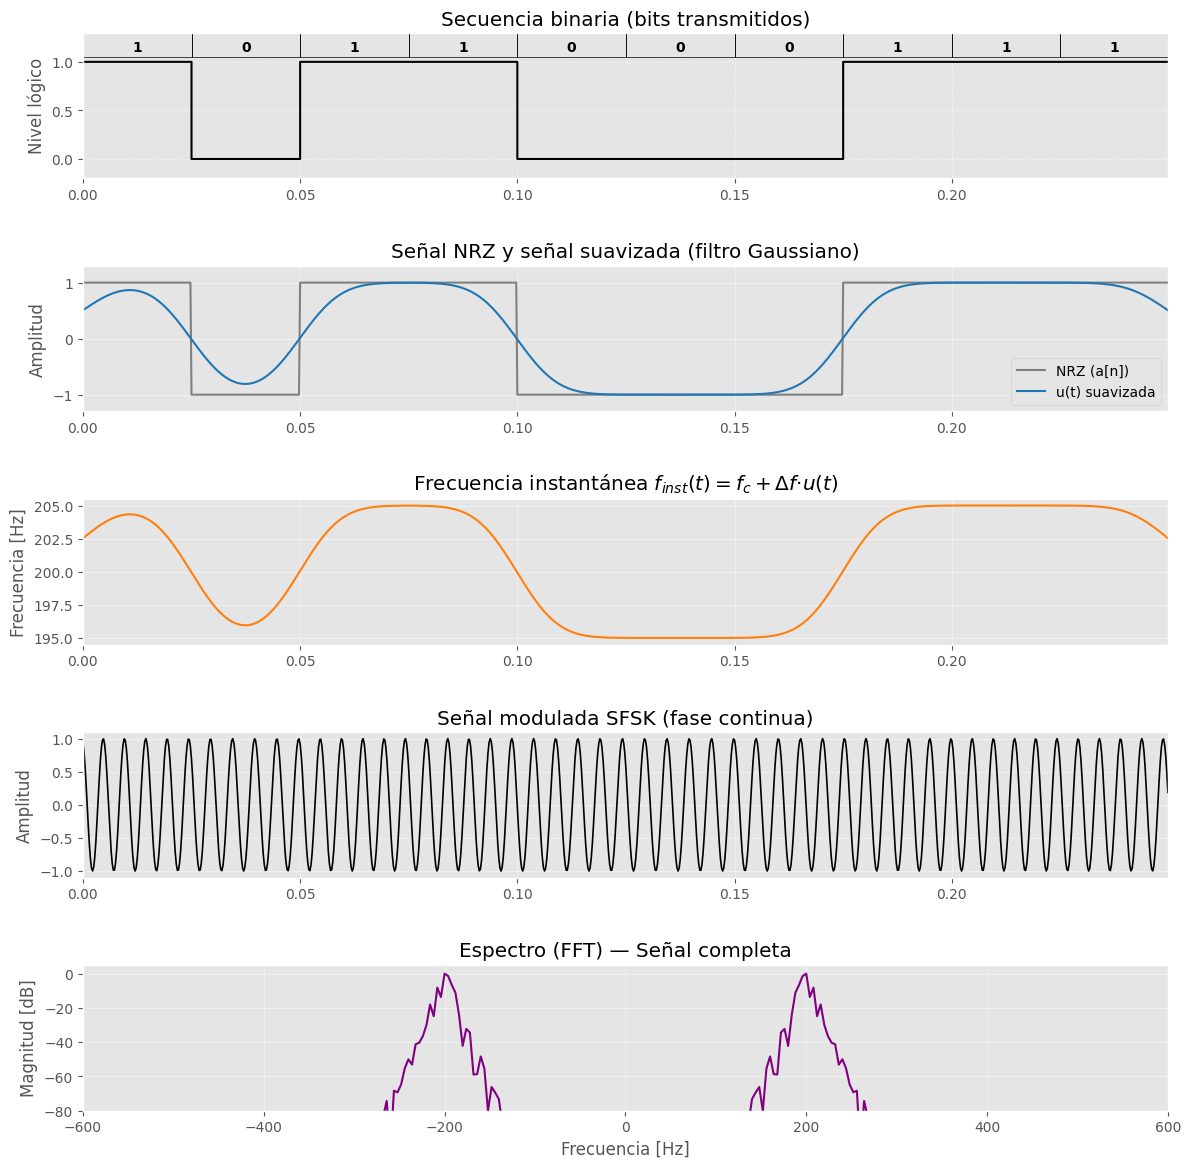

In [21]:
# ================================================================
# SFSK (GFSK-like) — Representación temporal y espectral sin animación
# ================================================================
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# -----------------------------
# Parámetros configurables
# -----------------------------
fs = 4000            # frecuencia de muestreo [Hz]
fc = 200             # frecuencia portadora [Hz]
Tb = 0.025           # duración de bit [s]
bits = np.array([1,0,1,1,0,0,0,1,1,1], dtype=int)

BT = 0.3             # producto Bandwidth-Time (shaping Gaussiano)
span_symbols = 4     # extensión del filtro en símbolos
Delta_f = 1.0 / (8.0 * Tb)   # desviación de frecuencia (Hz)

# -----------------------------
# Parámetros derivados
# -----------------------------
N_bits = len(bits)
Ns_bit = int(np.round(fs * Tb))
N_total = N_bits * Ns_bit
t_total = np.linspace(0, N_bits * Tb, N_total, endpoint=False)

# -----------------------------
# 1) Mapeo NRZ bipolar
# -----------------------------
a = 2 * bits - 1
a_samples = np.repeat(a, Ns_bit)

# -----------------------------
# 2) Filtro Gaussiano
# -----------------------------
kernel_half_len = int(span_symbols * Ns_bit)
t_kernel = np.linspace(-span_symbols * Tb, span_symbols * Tb, 2 * kernel_half_len + 1)
sigma = BT * Tb
h = np.exp(-0.5 * (t_kernel / sigma)**2)
h /= np.sum(h)

# -----------------------------
# 3) Señal suavizada (shaping)
# -----------------------------
u = np.convolve(a_samples, h, mode='same')
u /= np.max(np.abs(u))

# -----------------------------
# 4) Frecuencia instantánea y fase
# -----------------------------
f_inst = fc + Delta_f * u
phi = 2 * np.pi * np.cumsum(f_inst) / fs
s_sfsK = np.cos(phi)

# -----------------------------
# 5) FFT
# -----------------------------
def compute_fft(signal, fs):
    N = len(signal)
    window = np.hanning(N)
    S = np.fft.fftshift(np.fft.fft(signal * window))
    f = np.fft.fftshift(np.fft.fftfreq(N, 1/fs))
    S_db = 20 * np.log10(np.abs(S) / np.max(np.abs(S)) + 1e-12)
    return f, S_db

f_axis, S_db = compute_fft(s_sfsK, fs)

# ================================================================
# GRÁFICOS ESTÁTICOS ORGANIZADOS
# ================================================================
fig, axs = plt.subplots(5, 1, figsize=(14, 14))
plt.subplots_adjust(hspace=0.6)

# 1️⃣ Secuencia binaria
axs[0].step(np.repeat(t_total, 1), np.repeat(bits, Ns_bit), where='post', color='k')
axs[0].set_title("Secuencia binaria (bits transmitidos)")
axs[0].set_ylim(-0.2, 1.3)
axs[0].set_xlim(0, t_total[-1])
axs[0].set_ylabel("Nivel lógico")
axs[0].grid(True, ls='--', alpha=0.4)
for i, b in enumerate(bits):
    axs[0].add_patch(Rectangle((i * Tb, 1.05), Tb, 0.25, fill=False, edgecolor='k'))
    axs[0].text(i * Tb + Tb/2, 1.15, str(b), ha='center', va='center', fontsize=10, fontweight='bold')

# 2️⃣ Señal NRZ vs señal suavizada
axs[1].plot(t_total, a_samples, label='NRZ (a[n])', color='gray')
axs[1].plot(t_total, u, label='u(t) suavizada', color='tab:blue')
axs[1].set_title("Señal NRZ y señal suavizada (filtro Gaussiano)")
axs[1].set_xlim(0, t_total[-1])
axs[1].set_ylim(-1.3, 1.3)
axs[1].set_ylabel("Amplitud")
axs[1].legend()
axs[1].grid(True, alpha=0.4)

# 3️⃣ Frecuencia instantánea
axs[2].plot(t_total, f_inst, color='tab:orange')
axs[2].set_title("Frecuencia instantánea $f_{inst}(t) = f_c + Δf·u(t)$")
axs[2].set_xlim(0, t_total[-1])
axs[2].set_ylabel("Frecuencia [Hz]")
axs[2].grid(True, alpha=0.4)

# 4️⃣ Señal modulada (pasabanda)
axs[3].plot(t_total, s_sfsK, color='k', lw=1.2)
axs[3].set_title("Señal modulada SFSK (fase continua)")
axs[3].set_xlim(0, t_total[-1])
axs[3].set_ylabel("Amplitud")
axs[3].grid(True, alpha=0.4)

# 5️⃣ Espectro (FFT)
axs[4].plot(f_axis, S_db, color='purple', lw=1.5)
axs[4].set_title("Espectro (FFT) — Señal completa")
axs[4].set_xlim(-600, 600)
axs[4].set_ylim(-80, 5)
axs[4].set_xlabel("Frecuencia [Hz]")
axs[4].set_ylabel("Magnitud [dB]")
axs[4].grid(True, which='both', alpha=0.4)

plt.show()
